<a class="anchor" id="top"></a>

# 1. Importing Libraries & Data
In this section, we set up the foundation for our project by importing the necessary Python libraries and loading the dataset. These libraries provide the tools for data manipulation, visualization, and machine learning modeling throughout the notebook. Additionally, we import the historical claims dataset, which forms the core of our analysis. 

In [1]:
import pandas as pd
import numpy as np


import utils as u

import matplotlib.pyplot as plt
import seaborn as sns
import viz as v

%matplotlib inline

pd.set_option('display.max_columns', None)
# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

**Import Data**

In [2]:
# Load training data
df = pd.read_csv('./project_data/train_data.csv', index_col = 'Claim Identifier')

# Load testing data
test = pd.read_csv('./project_data/test_data.csv', index_col = 'Claim Identifier')

# Display the first 3 rows of the training data
df.head(3)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0


# 2. Exploratory Data Analysis
This section is dedicated to conducting an in-depth Exploratory Data Analysis (EDA) to comprehend the dataset’s structure, statistical properties, and inherent patterns. Through systematic analysis, we aim to identify key relationships among variables, detect potential anomalies, and evaluate the completeness and quality of the data. The findings from this stage serve as a critical foundation for subsequent data preprocessing and model development, ensuring that informed and data-driven decisions guide the overall analytical workflow.

<a href="#top">Top &#129033;</a>

**Profile Report**

In [136]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(
#     df, 
#     title='Data',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )

# profile

From using a `Profile Report` we were able to identify some possible problems about variables:
- WCB Decision has constant value "Not Work Related"
- Alternative Dispute Resolution is highly imbalanced (97.3%)
- C-3 Date has 406226 (68.4%) missing values
- First Hearing Date has 442673 (74.6%) missing values
- IME-4 Count has 460668 (77.6%) missing values
- OIICS Nature of Injury Description has 593471 (100.0%) missing values
- Zip Code is an unsupported type, check if it needs cleaning or further analysis
- Average Weekly Wage has 335450 (56.5%) zeros
- Birth Year has 25081 (4.2%) zeros
- Claim Injury Type (Target) has 19445 (3.3%) missing values and is imbalanced

And about the dataset itself:
- Dataset has 1103 (0.2%) duplicate rows

The same method was applied to test data

In [137]:
# profile_test = ProfileReport(
#     test, 
#     title='Data',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )

# profile_test

From using a `Profile Report` for the test data we were able to identify some possible problems about variables:
- Alternative Dispute Resolution is highly imbalanced (97.5%)
- COVID-19 Indicator is highly imbalanced (94.3%)
- First Hearing Date has 344947 (88.9%) missing values
- IME-4 Count has 352726 (90.9%) missing values
- OIICS Nature of Injury Description has 387975 (100.0%) missing values

And about the test dataset itself: 
- Dataset has 2 (< 0.1%) duplicate rows

There are also columns that are present in the train data but not in the test data (apart from our Target variable):
- Agreement Reached
- WCB Decision

After using `Profile Report`, we will also employ well known methods for basic statistics, such as `describe`, `info` and `shape`, as well as print the unique values for each column.

In [138]:
# The "include='object'" argument limits the description to only categorical data types.
# Transpose the result (.T) to display statistics in a more readable format with rows as columns.
df.describe(include='object').T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593471,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


In [139]:
# .describe provides statistical summaries for the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,42.114270,14.256432,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,491.088321,6092.918120,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,58.645305,19.644175,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,54.381143,25.874281,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,41.013839,22.207521,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,39.738146,22.365940,-9.0,33.0,38.0,53.0,99.0
Agreement Reached,574026.0,0.046665,0.210921,0.0,0.0,0.0,0.0,1.0


In [140]:
# Display summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

In [141]:
# Check the dimensions of the dataset (number of rows and columns)
df.shape

(593471, 32)

In [142]:
# Loop through each column in the DataFrame
for column in df.columns:
    
    # Check if the number of unique values in the column is less than 20
    if df[column].nunique() < 20:
        
        # Print unique values and count for columns with fewer than 20 unique values
        print(f"Unique values in '{column}': {df[column].unique()}")
        print(f"Number of unique values: {df[column].nunique()}\n")

Unique values in 'Alternative Dispute Resolution': ['N' nan 'Y' 'U']
Number of unique values: 3

Unique values in 'Attorney/Representative': ['N' 'Y' nan]
Number of unique values: 2

Unique values in 'Carrier Type': ['1A. PRIVATE' nan '2A. SIF' '4A. SELF PRIVATE' '3A. SELF PUBLIC'
 'UNKNOWN' '5D. SPECIAL FUND - UNKNOWN'
 '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'
 '5C. SPECIAL FUND - POI CARRIER WCB MENANDS']
Number of unique values: 8

Unique values in 'Claim Injury Type': ['2. NON-COMP' '4. TEMPORARY' nan '3. MED ONLY' '5. PPD SCH LOSS'
 '6. PPD NSL' '1. CANCELLED' '8. DEATH' '7. PTD']
Number of unique values: 8

Unique values in 'COVID-19 Indicator': ['N' nan 'Y']
Number of unique values: 2

Unique values in 'District Name': ['SYRACUSE' 'ROCHESTER' 'ALBANY' nan 'HAUPPAUGE' 'NYC' 'BUFFALO'
 'BINGHAMTON' 'STATEWIDE']
Number of unique values: 8

Unique values in 'Gender': ['M' 'F' nan 'U' 'X']
Number of unique values: 4

Unique values in 'Medical Fee Region': ['I' 'II' nan 'IV' 'UK'

From these, we were able to conclude that the dataset had 593471 rows and 32 columns. 

Additionally, we noticed that:
- WCB Decision only had 1 unique value
- We have 4 different values for Gender
- Age ranges from 0 to 117
- Birth Year ranges from 0 to 2018


There is also a column which is always null, **OIICS Nature of Injury Description**.

## 2.1 Variable Exploration

Incoherencies, can compromise the integrity of the analysis and the performance of machine learning models. By systematically identifying and addressing these issues, we aim to enhance data quality and ensure the dataset is both accurate and reliable for subsequent preprocessing and modeling stages.

<a href="#top">Top &#129033;</a>

In this section we will start by dropping the features that exist in the train data (df) but not in the test, as well **OIICS Nature of Injury Description**, which is always null.

We will also correct the date datatypes in both df and test.

Then, we will individually analyze each variable to better understand it.

In [3]:
columns = ['Agreement Reached', 'WCB Decision', 'OIICS Nature of Injury Description']

In [4]:
df = df.drop(columns = columns, axis = 1)
test = test.drop(columns = columns[-1], axis = 1)

In [5]:
# List of columns to convert to datetime
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

# Apply pd.to_datetime() to each column in the list for both df and test
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    test[col] = pd.to_datetime(test[col], errors='coerce')


Having made these initial transformations, we will start the exploration by comparing the minimum, average and maximum values of both df and test datasets, for all numeric variables

In [6]:
num_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

obj_columns = [col for col in df.columns if isinstance(df[col].dtype, pd.CategoricalDtype) or df[col].dtype == 'object']

In [7]:
num_stats_compare = u.num_stats(df, test, num_columns)
num_comparison_df = pd.DataFrame(num_stats_compare).T
num_comparison_df

,DF Mean,Test Mean,DF Std,Test Std,DF Min,Test Min,DF 25%,Test 25%,DF 50%,Test 50%,DF 75%,Test 75%,DF Max,Test Max
Age at Injury,42.114270,41.414944,14.256432,14.501056,0.0,0.0,31.0,30.0,42.0,40.0,54.0,53.0,117.0,114.0
Average Weekly Wage,491.088321,183.343831,6092.918120,3542.310214,0.0,0.0,0.0,0.0,0.0,0.0,841.0,0.0,2828079.0,1950317.0
Birth Year,1886.767604,1875.383466,414.644423,444.659075,0.0,0.0,1965.0,1967.0,1977.0,1980.0,1989.0,1992.0,2018.0,2019.0
IME-4 Count,3.207337,2.118131,2.832303,1.465406,1.0,1.0,1.0,1.0,2.0,2.0,4.0,2.0,73.0,18.0
Industry Code,58.645305,58.653581,19.644175,18.710501,11.0,11.0,45.0,45.0,61.0,61.0,71.0,71.0,92.0,92.0
WCIO Cause of Injury Code,54.381143,53.335678,25.874281,26.176833,1.0,1.0,31.0,29.0,56.0,56.0,75.0,74.0,99.0,99.0
WCIO Nature of Injury Code,41.013839,38.373674,22.207521,20.966100,1.0,1.0,16.0,10.0,49.0,43.0,52.0,52.0,91.0,91.0
WCIO Part Of Body Code,39.738146,31.516109,22.365940,23.359950,-9.0,-9.0,33.0,15.0,38.0,36.0,53.0,51.0,99.0,99.0
Number of Dependents,3.006559,3.000284,2.000801,1.997982,0.0,0.0,1.0,1.0,3.0,3.0,5.0,5.0,6.0,6.0


From this table, the main conclusions are:
- **Average Weekly Wage** mean values in DF (491) are much larger than in test (183)
- **Average Weekly Wage** values in the 75% percentile are much larger in df (841) than in test (0), which indicates a distribution shift between DF and test sets

Apart from these, there are no other significant differences in the numeric columns of both sets.

In [8]:
obj_stats_compare = u.obj_stats(df, test, obj_columns)
obj_comparison_df = pd.DataFrame(obj_stats_compare).T
obj_comparison_df

,DF Unique,Test Unique,DF Mode,Test Mode,DF Top Value Count,Test Top Value Count
Alternative Dispute Resolution,3,3,N,N,571412,386314
Attorney/Representative,2,2,N,N,392291,306476
Carrier Name,2046,1598,STATE INSURANCE FUND,STATE INSURANCE FUND,111144,66189
Carrier Type,8,7,1A. PRIVATE,1A. PRIVATE,285368,201827
County of Injury,63,63,SUFFOLK,QUEENS,60430,40358
COVID-19 Indicator,2,2,N,N,546505,385434
District Name,8,8,NYC,NYC,270779,187972
Gender,4,4,M,M,335218,215343
Industry Code Description,20,20,HEALTH CARE AND SOCIAL ASSISTANCE,HEALTH CARE AND SOCIAL ASSISTANCE,114339,72207
Medical Fee Region,5,5,IV,IV,265981,182276


From this table, the main conclusions are:
- **Carrier Type** has 8 unique values in DF, but only 7 in test
- **WCIO Part Of Body Description** has 54 unique values in DF, but only 51 in test
- **County of Injury** Mode is SUFFOLK in DF, but QUEENS in test
- **WCIO Cause of Injury Description** and **WCIO Part Of Body Description** have different modes from DF to test

In [9]:
copy_df = df.copy()
len_df = len(df)
len_df

593471

### 2.1.1 Univariate Analysis

### Numerical Variables

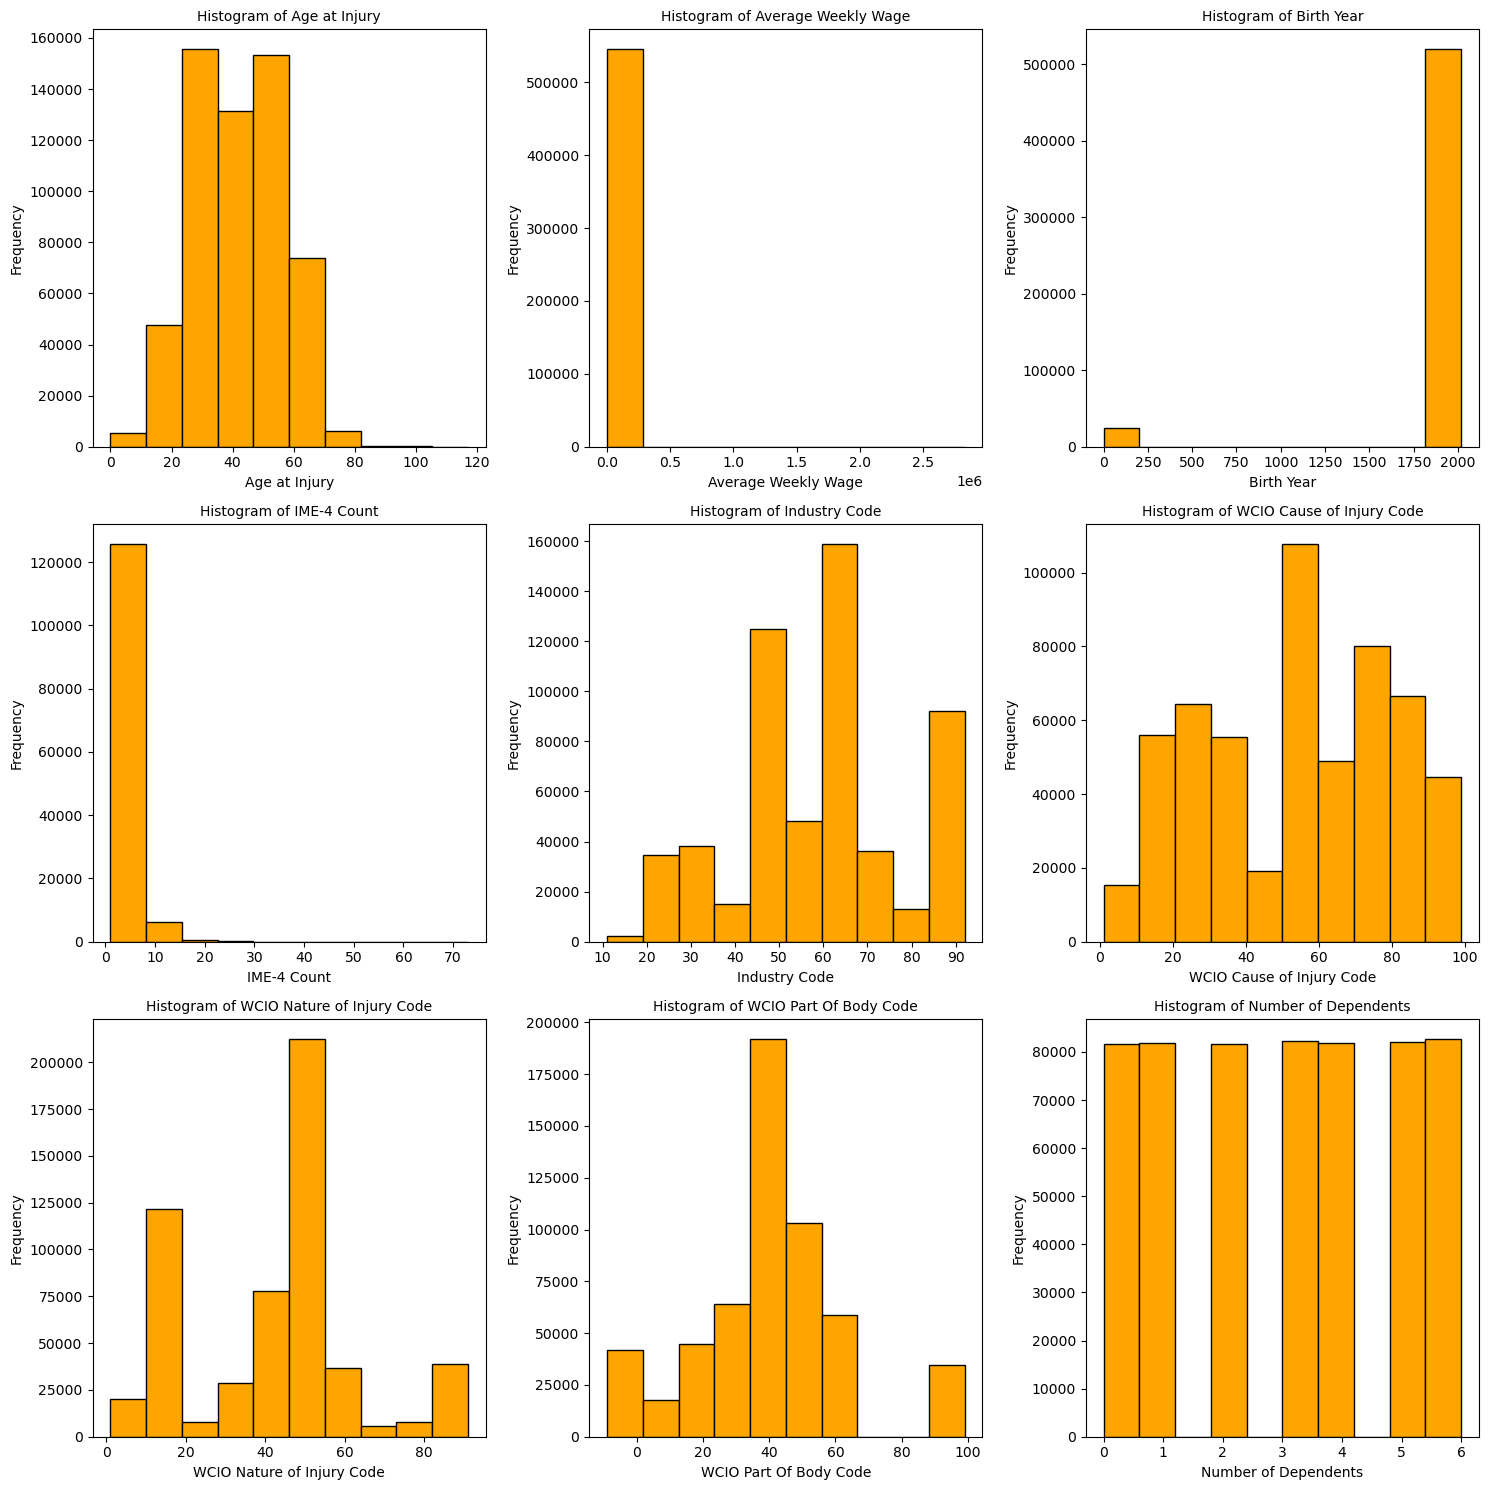

In [10]:
v.plot_numeric_histograms(df)

**Age at Injury**

In [11]:
print(df['Age at Injury'].describe())
print()
print(test['Age at Injury'].describe())

count    574026.000000
mean         42.114270
std          14.256432
min           0.000000
25%          31.000000
50%          42.000000
75%          54.000000
max         117.000000
Name: Age at Injury, dtype: float64

count    387975.000000
mean         41.414944
std          14.501056
min           0.000000
25%          30.000000
50%          40.000000
75%          53.000000
max         114.000000
Name: Age at Injury, dtype: float64


Set an treshold for age threshold for <80

In [12]:
len(df[df['Age at Injury'] <= 80]) / len_df

0.9659022934566306

In [13]:
df = df[df['Age at Injury'] <= 80]

**Average Weekly Wage**

In [14]:
print(df['Average Weekly Wage'].describe())
print()
print(test['Average Weekly Wage'].describe())

count    5.446130e+05
mean     4.914376e+02
std      6.096970e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.419800e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64

count    3.687710e+05
mean     1.833438e+02
std      3.542310e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.950317e+06
Name: Average Weekly Wage, dtype: float64


**Birth Year**

In [15]:
len(df[~((df['Birth Year'] == 0) & ((df['Claim Injury Type'].str.contains('2')) | (df['Claim Injury Type'].str.contains('4'))))]) / len_df

0.9330245285784815

In [16]:
df = df[~((df['Birth Year'] == 0) & ((df['Claim Injury Type'].str.contains('2')) | (df['Claim Injury Type'].str.contains('4'))))]

**IME-4 Count**

In [17]:
df['IME-4 Count'].value_counts()

IME-4 Count
1.0     39296
2.0     33712
3.0     15713
4.0     13405
5.0      7465
6.0      6216
7.0      3739
8.0      3058
9.0      1844
10.0     1416
11.0      977
12.0      782
13.0      492
14.0      381
15.0      267
16.0      210
18.0      138
17.0      119
19.0       77
20.0       53
21.0       53
22.0       34
23.0       17
24.0       16
27.0       14
25.0        7
26.0        6
29.0        5
28.0        4
30.0        4
32.0        4
34.0        4
36.0        3
33.0        2
31.0        2
39.0        2
37.0        1
48.0        1
35.0        1
47.0        1
73.0        1
Name: count, dtype: int64

In [18]:
len(df[(df['IME-4 Count'] <= 24) | (df['IME-4 Count'].isna())]) / len_df

0.9329200584358798

In [19]:
df = df[(df['IME-4 Count'] <= 24) | (df['IME-4 Count'].isna())]

**Number of Dependents**

In [20]:
df['Number of Dependents'].describe()

count    553661.000000
mean          3.006045
std           2.001103
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: Number of Dependents, dtype: float64

Check the size of DF before continuing

In [21]:
len(df) / len_df

0.9329200584358798

As it can be seen bellow, most removed observations were taken from the top 2 classes with most observations, keeping other classes almost intact.

For the code variables, their descriptions will be addressed in the next section.

In [22]:
copy_df['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

In [23]:
df['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        276888
4. TEMPORARY       142497
3. MED ONLY         68827
5. PPD SCH LOSS     48242
1. CANCELLED        12455
6. PPD NSL           4200
8. DEATH              455
7. PTD                 97
Name: count, dtype: int64

### Categorical Variables

**Alternative Dispute Resolution**

AS Y an N categories have very few values, we may consider dropping them. However, we must explore its relation with other features first

In [24]:
df['Alternative Dispute Resolution'].value_counts()

Alternative Dispute Resolution
N    551215
Y      2441
U         5
Name: count, dtype: int64

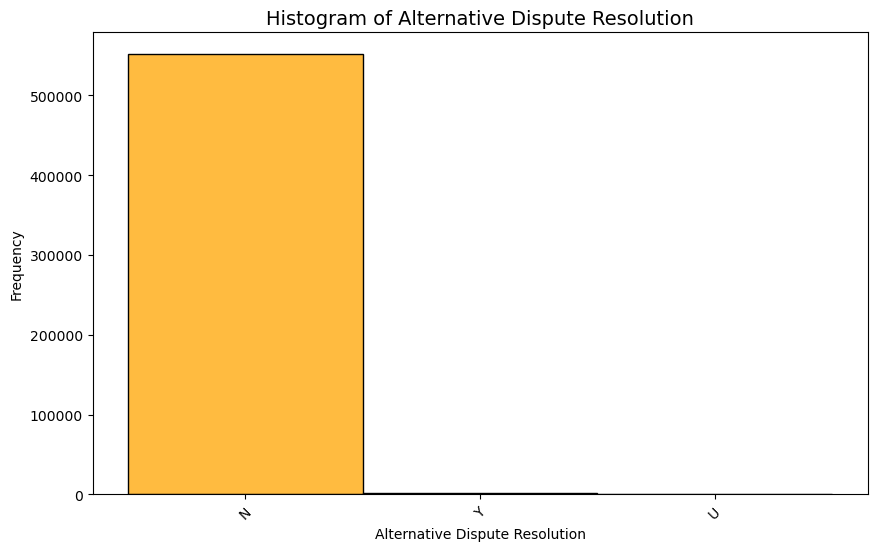

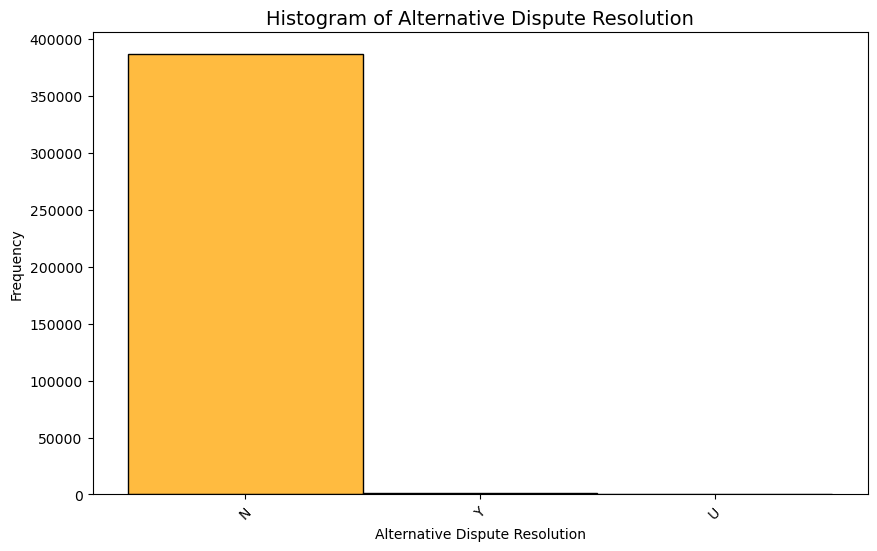

In [25]:
v.plot_histogram(df, 'Alternative Dispute Resolution')

v.plot_histogram(test, 'Alternative Dispute Resolution')

**Attorney/Representative**

In [26]:
df['Attorney/Representative'].value_counts()

Attorney/Representative
N    376902
Y    176759
Name: count, dtype: int64

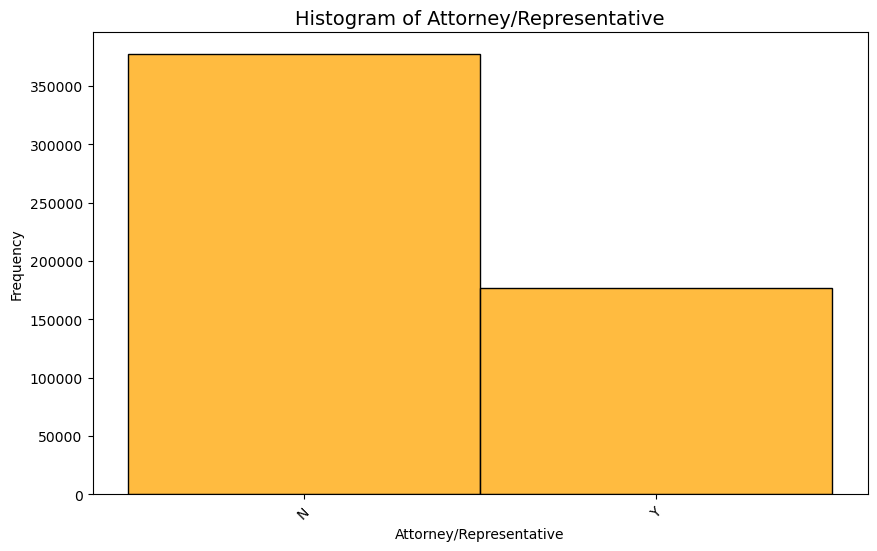

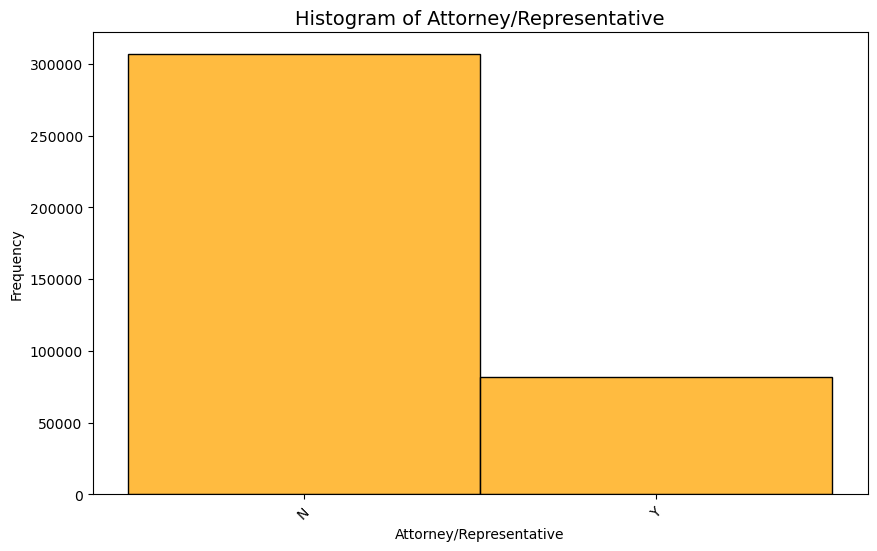

In [27]:
v.plot_histogram(df, 'Attorney/Representative')

v.plot_histogram(test, 'Attorney/Representative')

**Carrier Name**

In [28]:
freq = df['Carrier Name'].value_counts()
freq

Carrier Name
STATE INSURANCE FUND             107669
POLICE, FIRE, SANITATION          21424
AMERICAN ZURICH INSURANCE CO      16950
CHARTER OAK FIRE INS CO           16593
INDEMNITY INS. OF N AMERICA       13761
                                  ...  
GREAT AMERICAN SPIRIT INS. CO         1
GOLUB CORP                            1
ARGYLE CENTRAL SCHOOL DIST            1
ASSURANCE COMPANY OF AMERICA          1
HERMON-DEKALB CENTRAL                 1
Name: count, Length: 2030, dtype: int64

In [29]:
names = freq[freq < 10].index

df[(df['Carrier Name'].isin(names)) & ~((df['Claim Injury Type'].str.contains('2')) | 
                                      (df['Claim Injury Type'].str.contains('4')))]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5398361,2020-01-09,49.0,N,2020-01-09,N,0.00,1970.0,2020-01-09,NaT,GEORGE JUNIOR REPUBLIC,3A. SELF PUBLIC,3. MED ONLY,SCHUYLER,N,BINGHAMTON,NaT,F,NaN,61.0,EDUCATIONAL SERVICES,I,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,38.0,SHOULDER(S),14886,5.0
5398215,2020-01-06,54.0,N,2020-01-09,N,2064.13,1965.0,2020-01-09,NaT,GREENPORT UNION FREE,3A. SELF PUBLIC,3. MED ONLY,SUFFOLK,N,HAUPPAUGE,NaT,F,NaN,61.0,EDUCATIONAL SERVICES,III,29.0,ON SAME LEVEL,7.0,CONCUSSION,11.0,SKULL,11971,5.0
5400004,2019-11-07,41.0,N,2020-01-09,N,450.00,1978.0,2020-01-09,NaT,HDI GLOBAL INSURANCE COMPANY,1A. PRIVATE,3. MED ONLY,CLINTON,N,ALBANY,NaT,F,NaN,42.0,WHOLESALE TRADE,I,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,36.0,FINGER(S),12921,1.0
5401268,2020-01-07,54.0,N,2020-01-10,N,0.00,1965.0,2020-01-10,NaT,MT PLEASANT CENTRAL SCH DIST,3A. SELF PUBLIC,3. MED ONLY,WESTCHESTER,N,NYC,NaT,F,NaN,61.0,EDUCATIONAL SERVICES,III,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",49.0,SPRAIN OR TEAR,42.0,LOWER BACK AREA,10595,1.0
5401210,2020-01-08,37.0,N,2020-01-10,N,0.00,1982.0,2020-01-10,2020-01-10,SEWANHAKA CENTRAL HIGH,3A. SELF PUBLIC,3. MED ONLY,SUFFOLK,N,HAUPPAUGE,NaT,F,NaN,61.0,EDUCATIONAL SERVICES,IV,33.0,ON STAIRS,52.0,STRAIN OR TEAR,53.0,KNEE,11795,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155055,2022-12-14,36.0,N,2022-12-16,N,0.00,1986.0,2022-12-16,2022-12-29,PARISHVILLE-HOPKINTON CENTRAL,3A. SELF PUBLIC,3. MED ONLY,ST. LAWRENCE,N,SYRACUSE,2024-03-21,F,NaN,61.0,EDUCATIONAL SERVICES,I,16.0,"HAND TOOL, UTENSIL; NOT POWERED",40.0,LACERATION,36.0,FINGER(S),13676,4.0
6162226,2022-10-18,55.0,N,2022-12-27,Y,1355.94,1967.0,2023-04-20,2022-12-21,ISLAND PARK UFSD,3A. SELF PUBLIC,3. MED ONLY,NASSAU,N,NYC,2023-05-25,M,1.0,61.0,EDUCATIONAL SERVICES,IV,99.0,"OTHER - MISCELLANEOUS, NOC",1.0,NO PHYSICAL INJURY,35.0,HAND,11558,6.0
6163725,1985-08-13,26.0,N,2022-12-28,N,0.00,1959.0,2022-12-28,NaT,STANDARD FIRE INS CO,1A. PRIVATE,1. CANCELLED,OSWEGO,N,SYRACUSE,NaT,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,I,99.0,"OTHER - MISCELLANEOUS, NOC",34.0,HERNIA,61.0,ABDOMEN INCLUDING GROIN,13126,4.0


**Carrier Type**

As we previously identified, there are 2 categories present in DF (5A, 5C) that do not exist in test. This can be confirmed by the 2 visualisations bellow

In [30]:
df['Carrier Type'].value_counts()

Carrier Type
1A. PRIVATE                                    273423
3A. SELF PUBLIC                                118955
2A. SIF                                        107669
4A. SELF PRIVATE                                51080
UNKNOWN                                          1589
5D. SPECIAL FUND - UNKNOWN                        937
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          4
Name: count, dtype: int64

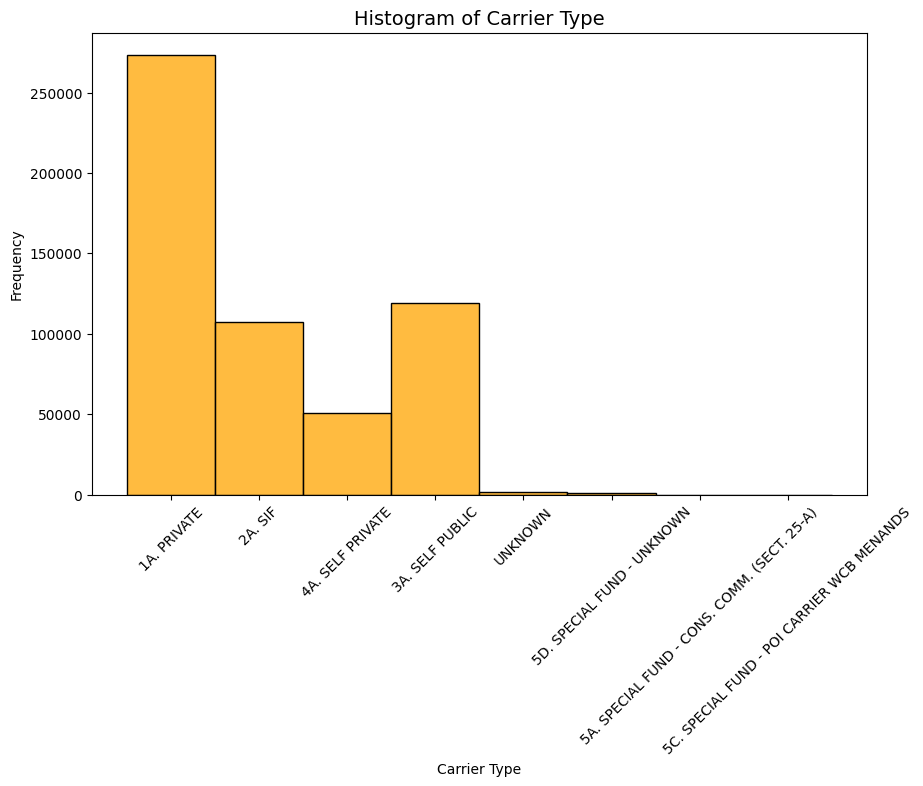

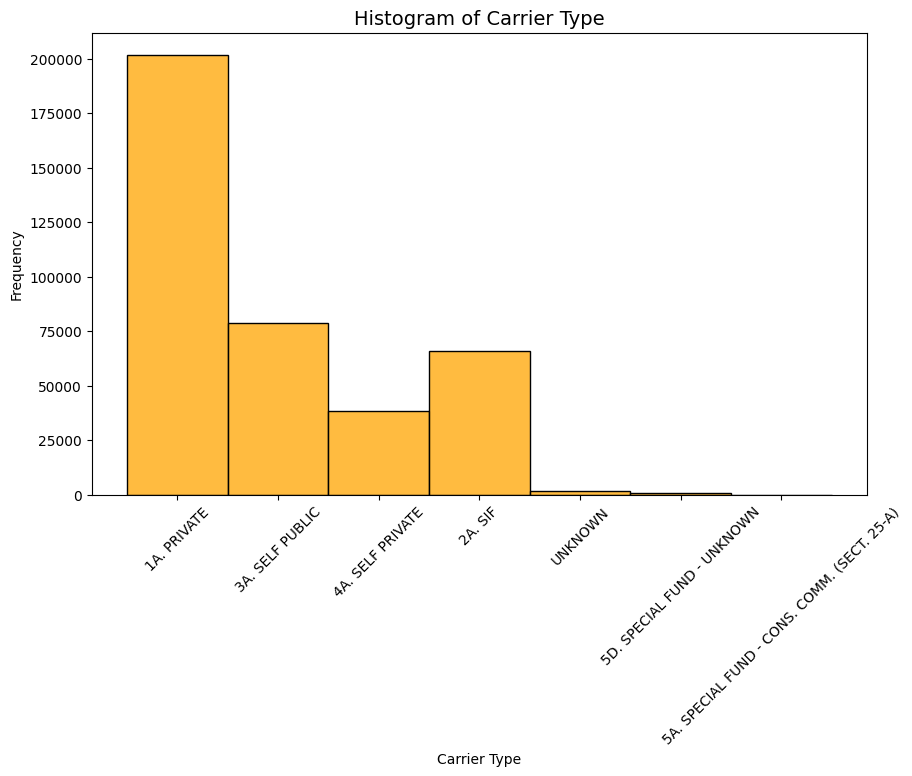

In [25]:
v.plot_histogram(df, 'Carrier Type')

v.plot_histogram(test, 'Carrier Type')

**County of Injury**

In [35]:
import json

with open("/Users/antoniooliveira/Downloads/geojson-counties-fips.json", 'r') as f:
    geojson_data = json.load(f)
    print(geojson_data.keys())  # Check the structure


dict_keys(['type', 'features'])


In [43]:
# Extract the county names and coordinates from the GeoJSON
county_mapping = {}
for feature in geojson_data["features"]:
    county_name = feature["properties"]["NAME"].upper()  # Convert to uppercase for matching
    county_mapping[county_name] = feature["geometry"]  # Store geometry for later extraction

# Now match the County of Injury values to the counties in the GeoJSON
injury_counties = df['County of Injury'].dropna().unique()

non_matched = {}
matched_counties = {}
matched_coordinates = {}

for county in injury_counties:
    county_upper = county.upper()  # Convert to uppercase to match
    if county_upper in county_mapping:
        matched_counties[county_upper] = county_mapping[county_upper]
        # Extract the coordinates for the matched county
        geometry = county_mapping[county_upper]
        if geometry["type"] == "Point":
            # For point geometries, extract the single coordinate
            matched_coordinates[county_upper] = geometry["coordinates"]
        elif geometry["type"] == "Polygon" or geometry["type"] == "MultiPolygon":
            # For polygons and multipolygons, extract the coordinates
            matched_coordinates[county_upper] = geometry["coordinates"]
    else:
        non_matched[county_upper] = "No match found"  # Store a message for unmatched counties


Matched Counties with Coordinates:
ST. LAWRENCE: [[[-74.72498, 45.005915], [-74.720307, 44.953011], [-74.641872, 44.952621], [-74.525683, 44.170636], [-74.535156, 44.09925], [-74.854171, 44.070089], [-75.062779, 44.0504], [-75.170159, 44.096959], [-75.446124, 44.217655], [-75.86006, 44.403282], [-75.82083, 44.432244], [-75.807778, 44.471644], [-75.765495, 44.516285], [-75.696586, 44.567583], [-75.491201, 44.712947], [-75.433124, 44.750062], [-75.333744, 44.806378], [-75.301975, 44.826637], [-75.30763, 44.836813], [-75.283136, 44.849156], [-75.216486, 44.877478], [-75.189313, 44.883037], [-75.139868, 44.896676], [-75.064826, 44.929449], [-75.027125, 44.946568], [-75.005155, 44.958402], [-74.999655, 44.965921], [-74.99927, 44.971638], [-74.992756, 44.977449], [-74.972463, 44.983402], [-74.826578, 45.01585], [-74.801625, 45.014571], [-74.72498, 45.005915]]]
WYOMING: [[[-76.2831, 41.376517], [-76.223866, 41.524544], [-76.220139, 41.541285], [-76.197998, 41.647823], [-76.115172, 41.651825],

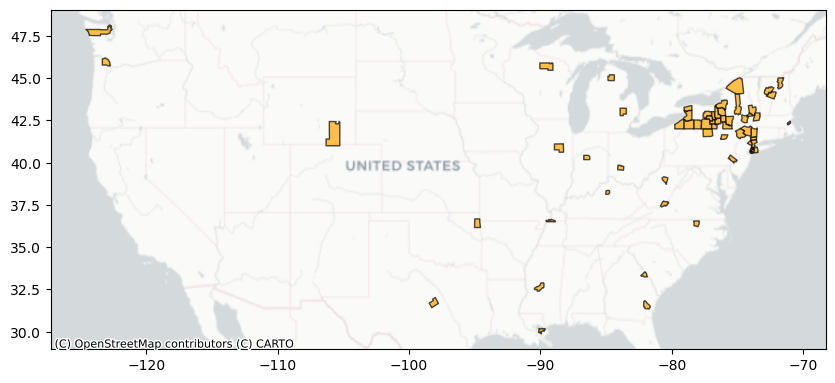

In [66]:


# Create an empty list to store the geometries
geometries = []

# Loop through the matched coordinates and handle geometry correctly
for county, coords in matched_coordinates.items():
    try:
        # Handle Point (latitude, longitude) as a simple point geometry
        if isinstance(coords, float):  # If it's a float, it's a point (lat, lon)
            geometries.append(Point(coords))  # Assuming coords are in (lat, lon) format
        
        # Handle Polygon or MultiPolygon geometries
        elif isinstance(coords, list):  # If coords is a list, it could be a Polygon or MultiPolygon
            if isinstance(coords[0], list):  # If the first element is a list of coordinates (for polygons)
                if len(coords) == 1:  # Single polygon
                    geometries.append(Polygon(coords[0]))  # polygon[0] is the boundary of the polygon
                else:  # MultiPolygon
                    multipolygon = MultiPolygon([Polygon(p[0]) for p in coords])
                    geometries.append(multipolygon)
            else:  # If it's neither a list of coordinates, handle it differently
                raise ValueError(f"Invalid format for {county} with coordinates: {coords}")
        
        else:
            raise ValueError(f"Unexpected coordinate format for {county}: {coords}")
    
    except Exception as e:
        # Log the error and the county name
        print(f"Error processing {county}: {e}")

# Check if there are any empty geometries
if not geometries:
    print("No geometries were successfully processed!")

# Check the geometries list and create a GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=geometries)

# Set CRS (Coordinate Reference System) for the GeoDataFrame to match the basemap
gdf.set_crs('EPSG:4326', allow_override=True, inplace=True)

# Plotting with background map
ax = gdf.plot(figsize=(10, 10), alpha=0.7, edgecolor='k', color='orange')

# Add basemap using contextily (Web Map Tile Service)
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Show plot
plt.show()


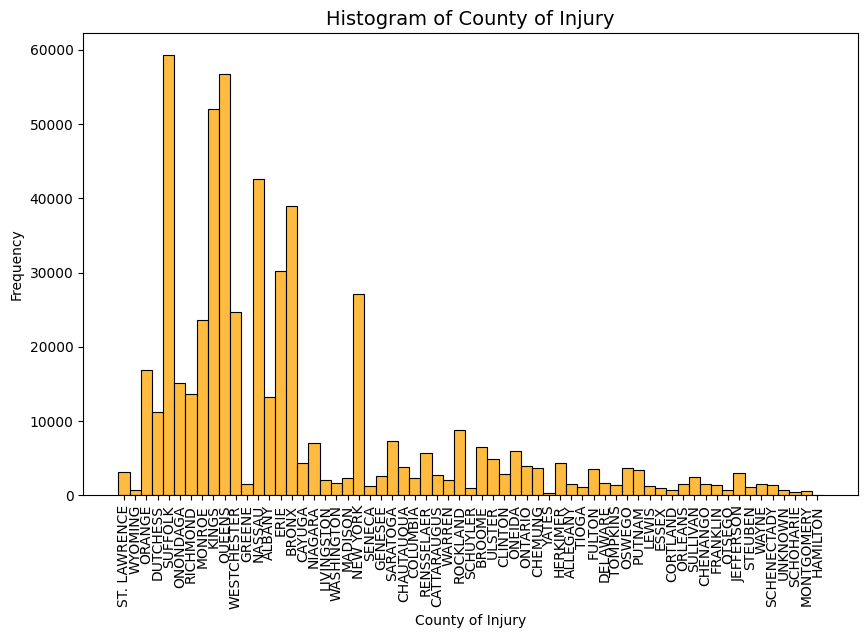

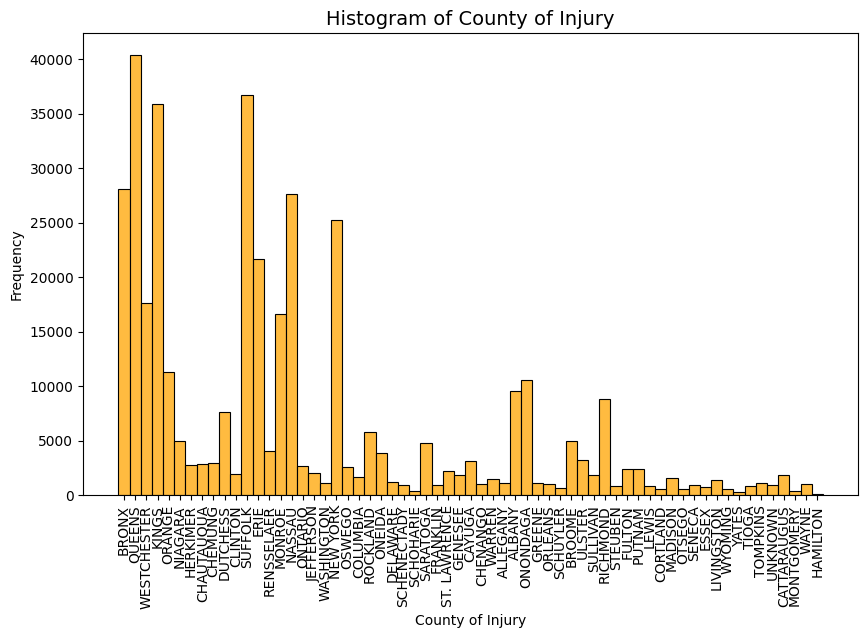

In [30]:
v.plot_histogram(df, 'County of Injury',
                 rotation = 90)

v.plot_histogram(test, 'County of Injury',
                 rotation = 90)

**COVID-19 Indicator**

In [37]:
df['COVID-19 Indicator'].value_counts()

COVID-19 Indicator
N    527209
Y     26452
Name: count, dtype: int64

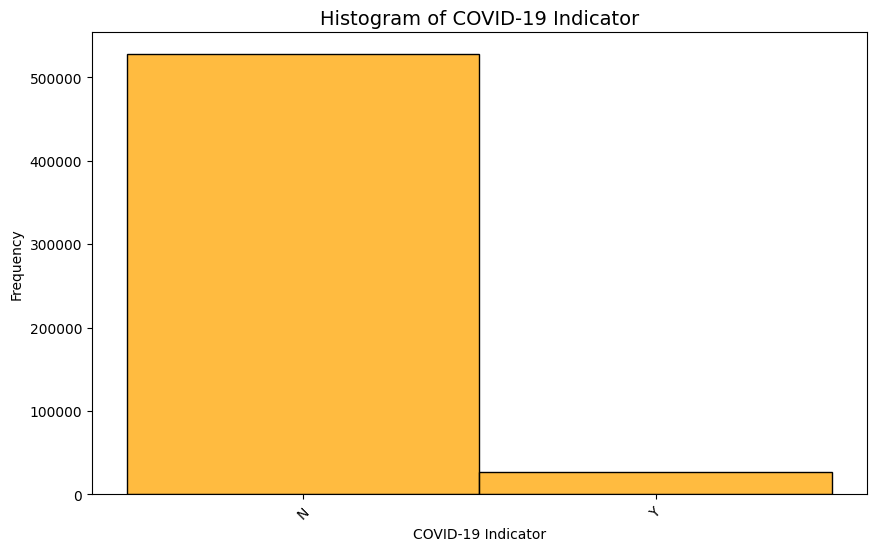

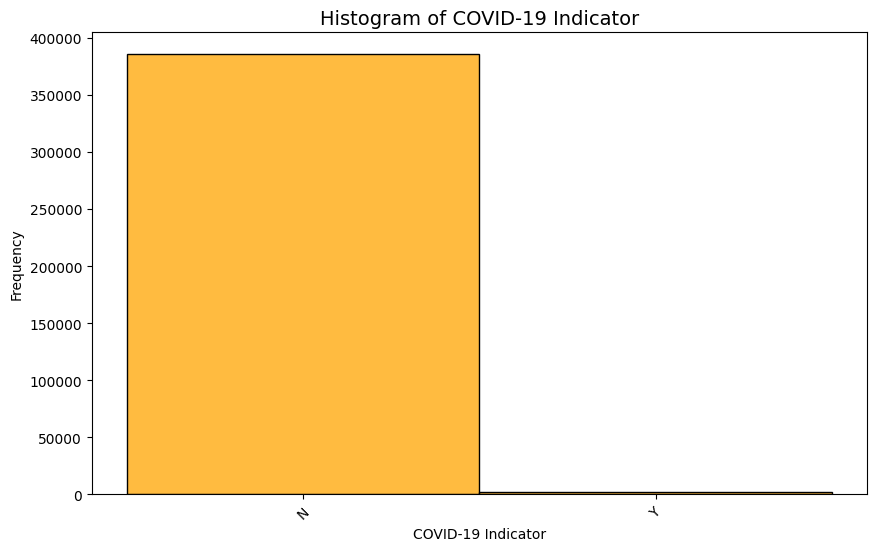

In [38]:
v.plot_histogram(df, 'COVID-19 Indicator')

v.plot_histogram(test, 'COVID-19 Indicator')

**District Name**

In [ ]:
df['District Name'].value_counts()

**Gender**

In [ ]:
df['Gender'].value_counts()

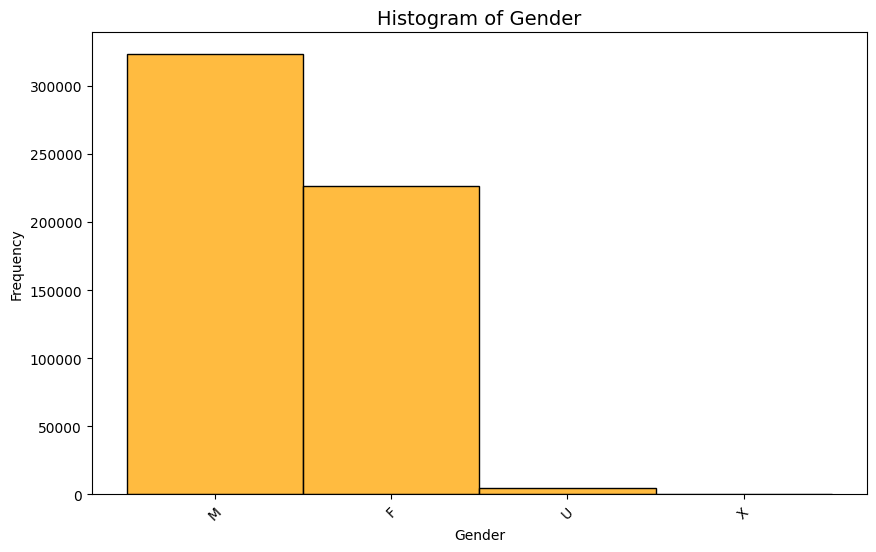

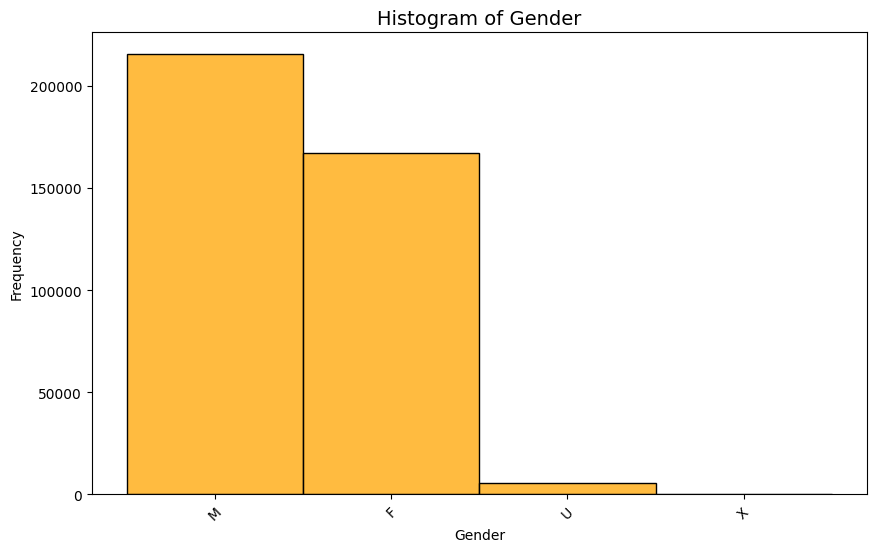

In [39]:
v.plot_histogram(df, 'Gender')

v.plot_histogram(test, 'Gender')

**Industry Code Description**

**Medical Fee Region**

In [193]:
obj_columns

['Alternative Dispute Resolution',
 'Attorney/Representative',
 'Carrier Name',
 'Carrier Type',
 'Claim Injury Type',
 'County of Injury',
 'COVID-19 Indicator',
 'District Name',
 'Gender',
 'Industry Code Description',
 'Medical Fee Region',
 'WCIO Cause of Injury Description',
 'WCIO Nature of Injury Description',
 'WCIO Part Of Body Description',
 'Zip Code']

**WCIO Cause of Injury Description**

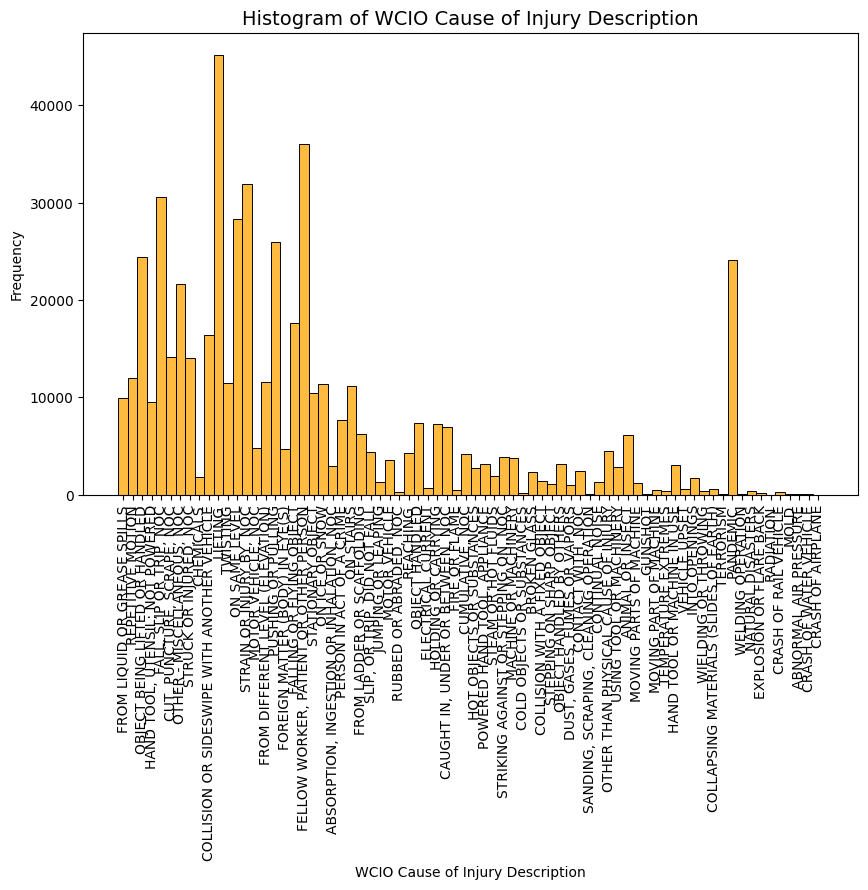

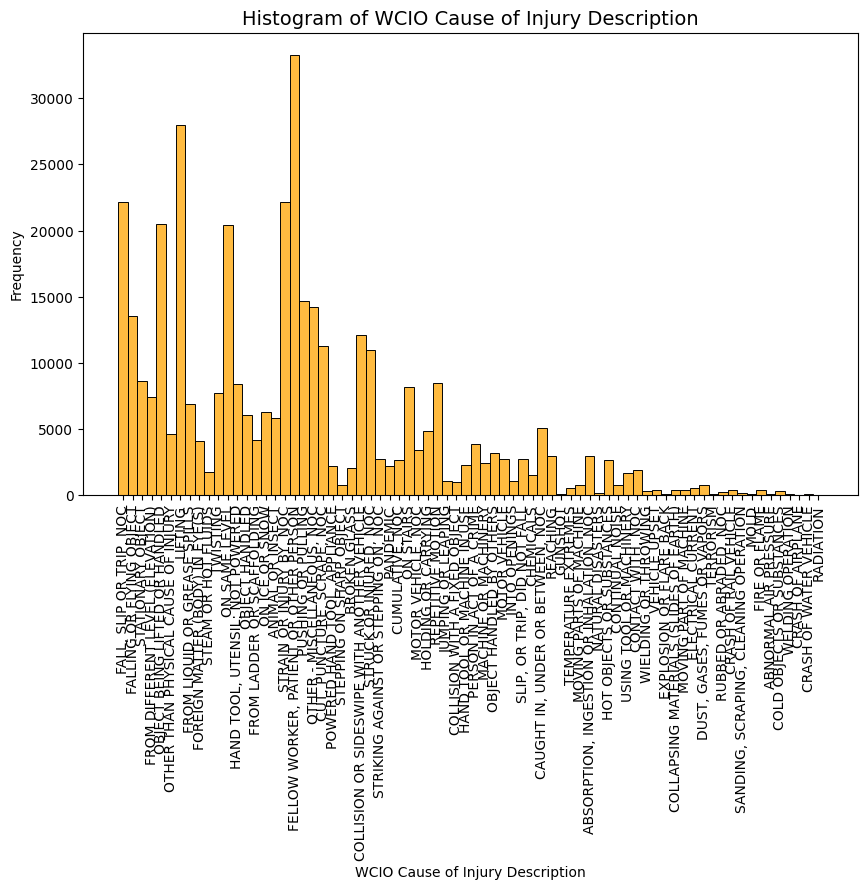

In [40]:
v.plot_histogram(df, 'WCIO Cause of Injury Description', 
                          rotation = 90)


v.plot_histogram(test, 'WCIO Cause of Injury Description', 
                          rotation = 90)

**WCIO Nature of Injury Description**

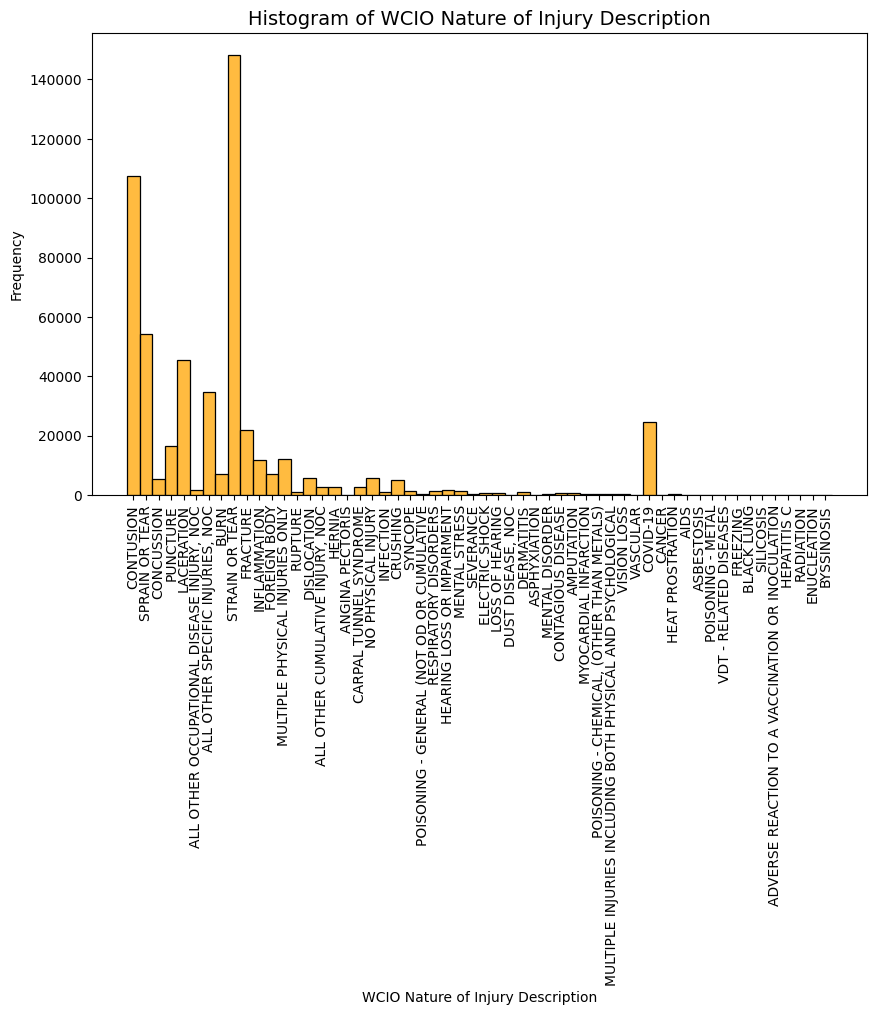

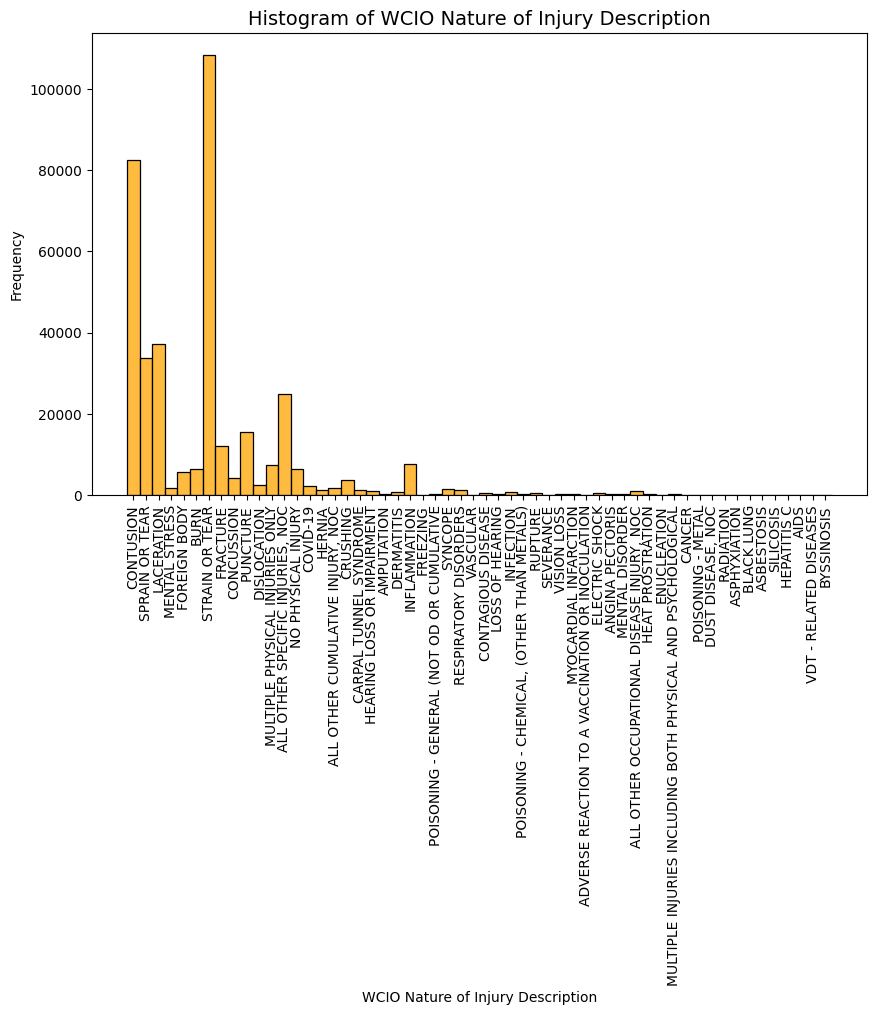

In [41]:
v.plot_histogram(df, 'WCIO Nature of Injury Description', 
                          rotation = 90)


v.plot_histogram(test, 'WCIO Nature of Injury Description', 
                          rotation = 90)

**WCIO Part Of Body Description**

In DF, even though teh category 'Multiple' is still common, there are 2 categories that are even more common ('Lower Back Area' and 'Knee'), when comparing to the test data.

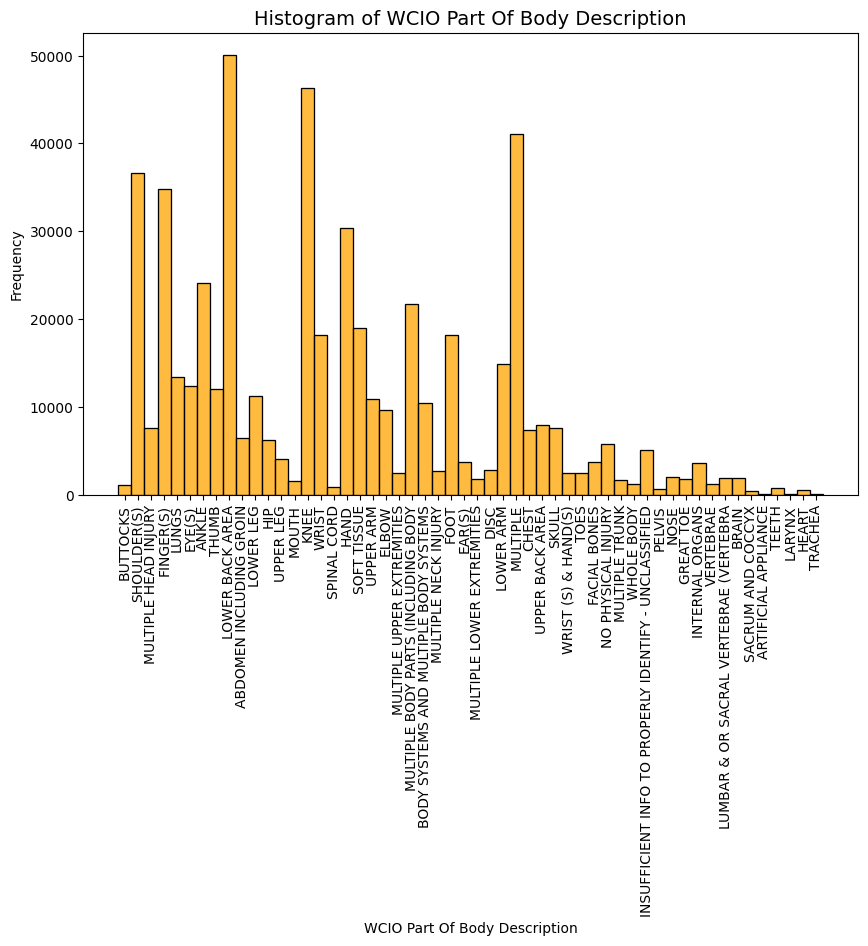

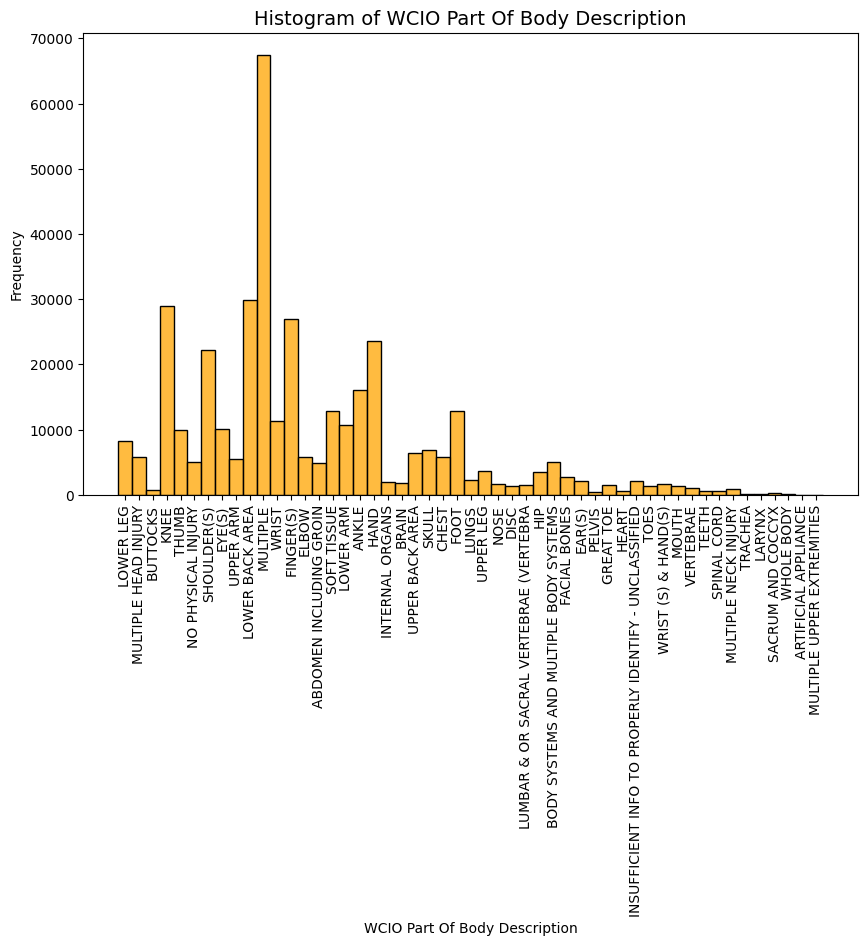

In [192]:
v.plot_histogram(df, 'WCIO Part Of Body Description', 
                          rotation = 90)


v.plot_histogram(test, 'WCIO Part Of Body Description', 
                          rotation = 90)

**Zip Code**

In [42]:
df['Zip Code'].value_counts()

Zip Code
11236    3298
10940    2963
11717    2798
11434    2748
11706    2718
         ... 
17512       1
90026       1
38017       1
89015       1
90241       1
Name: count, Length: 6170, dtype: int64

### 2.1.2 Bivariate Analysis

### Numerical vs Numerical

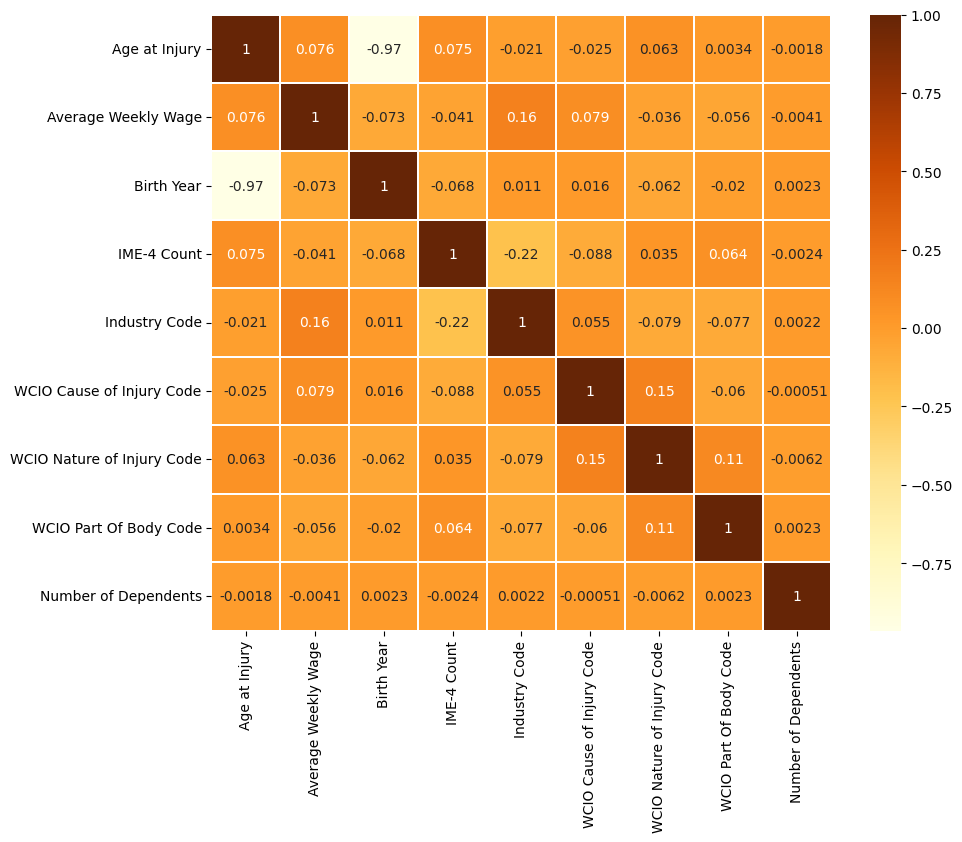

In [27]:
# Remove rows with missing values
temp = df.dropna()

# Select numerical columns for correlation analysis
corr_data = temp.select_dtypes(include=['number'])

# Compute the Spearman correlation matrix (Pearson is the default)
correlation_matrix = corr_data.corr(method='spearman')

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', linewidths=0.1)
plt.show()

From plotting a correlation matrix for numeric features, we can conclude that there are no highly positive correlations. Nonetheless, there is a highly negative correlation (-0.97) between **Birth Year** and **Age at Injury**. 

This negative correlation was to be expected, as the age can be computed from the birth year, and the higher the birth year, the lower the age.

This problem will be addressed later in the project.

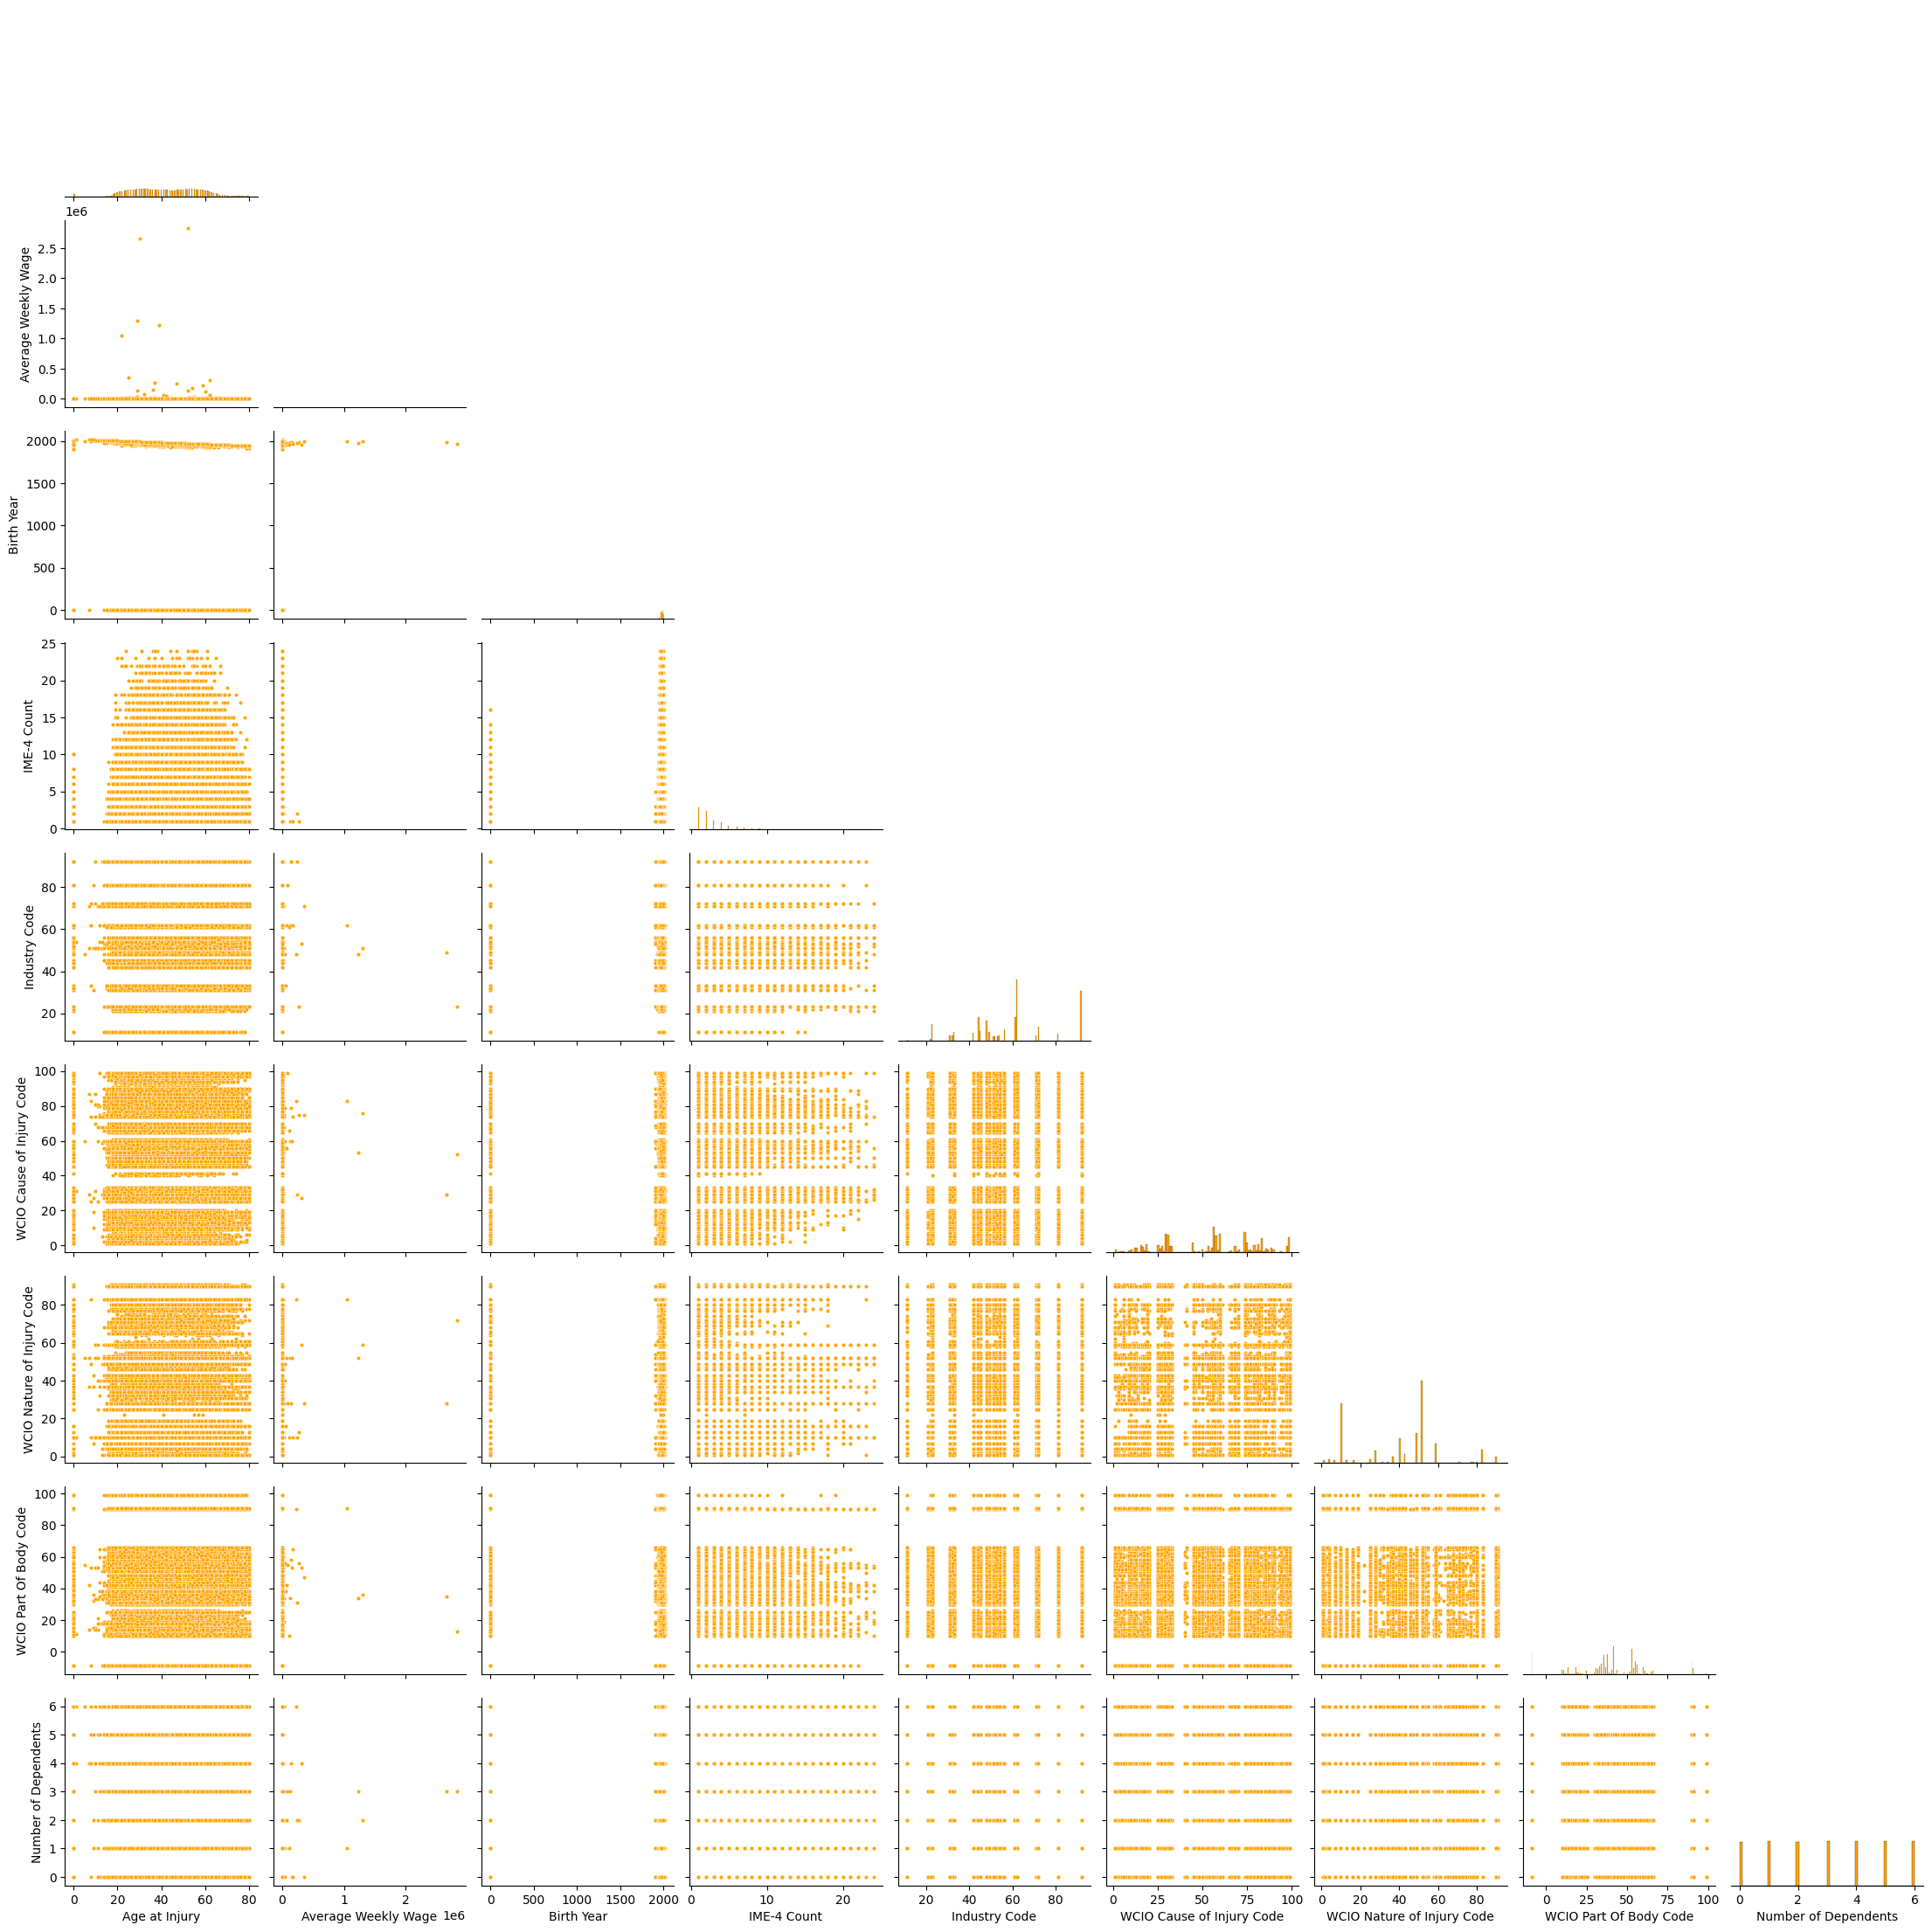

In [29]:
v.plot_pairwise_relationship(df)

Above we are plotting scatterplots for all combinations of numeric variables, looking for linear relationships between them. Since this matrix is mirrored on the diagonal, we decided to only display half of it.

This allowed us to conclude that there are no linear relationships when combining two numeric variables.

### Numerical vs Categorical

In [ ]:
discrete = ['Birth Year', 'IME-4 Count', 'Industry Code',
            'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
            'WCIO Part Of Body Code', 'Number of Dependents']

continuous = ['Age at Injury', 'Average Weekly Wage']

objects = [col for col in df.select_dtypes(include=['object']).columns
               if df[col].nunique() < 9]

For Categorical vs Numerical Discrete Variables

In [ ]:
# def plot_categorical_vs_discrete_matrix(df, categorical, discrete, n_cols=3):
#     # Calculate the number of rows needed based on the number of categories and columns
#     n_cats = len(categorical)
#     n_discrete = len(discrete)
    
#     # Calculate number of rows required
#     n_rows = int(np.ceil(n_cats * n_discrete / n_cols))
    
#     # Create a figure with subplots
#     fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 6, n_rows * 6))
    
#     # Flatten axes for easy iteration
#     axes = axes.flatten()

#     plot_idx = 0
#     for i, cat in enumerate(categorical):
#         for j, disc in enumerate(discrete):
#             if plot_idx < len(axes):
#                 # Plot the countplot for each combination of categorical and discrete variables
#                 sns.countplot(x=disc, hue=cat, data=df, palette='Oranges', ax=axes[plot_idx])
#                 axes[plot_idx].set_title(f'{cat} vs {disc}')
#                 axes[plot_idx].tick_params(axis='x', rotation=45)
#                 plot_idx += 1
                
                
#                 # Hide x-tick labels if there are more than 8
#                 if len(df[column].value_counts()) > 8:
#                     axes.set_xticklabels([])
#                 else:
#                     axes.tick_params(axis='x', rotation=45)

#     # Hide any unused subplots
#     for idx in range(plot_idx, len(axes)):
#         axes[idx].axis('off')

#     # Adjust layout for better spacing
#     plt.tight_layout()
#     plt.show()

In [ ]:
# plot_categorical_vs_discrete_matrix(df, categorical, discrete, n_cols=3)

For Categorical vs Numerical Continuous Variables

In [ ]:
def plot_categ_cont(df, categorical, continuous, n_cols=3):
    # Calculate the number of rows needed based on number of categories and columns
    n_cats = len(categorical)
    n_cont = len(continuous)
    
    # Calculate number of rows required
    n_rows = int(np.ceil(n_cats / n_cols))
    
    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 6, n_rows * 6))
    
    # Flatten axes for easy iteration
    axes = axes.flatten()

    plot_idx = 0
    for i, cat in enumerate(categorical):
        for j, cont in enumerate(continuous):
            if plot_idx < len(axes):
                sns.boxplot(x=cat, y=cont, data=df, palette='Oranges', ax=axes[plot_idx])
                axes[plot_idx].set_title(f'{cat} vs {cont}')
                axes[plot_idx].tick_params(axis='x', rotation=45)
                plot_idx += 1

    # Hide any unused subplots
    for idx in range(plot_idx, len(axes)):
        axes[idx].axis('off')

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

In [ ]:
plot_categ_cont(df, categorical, continuous)

### Categorical vs Categorical

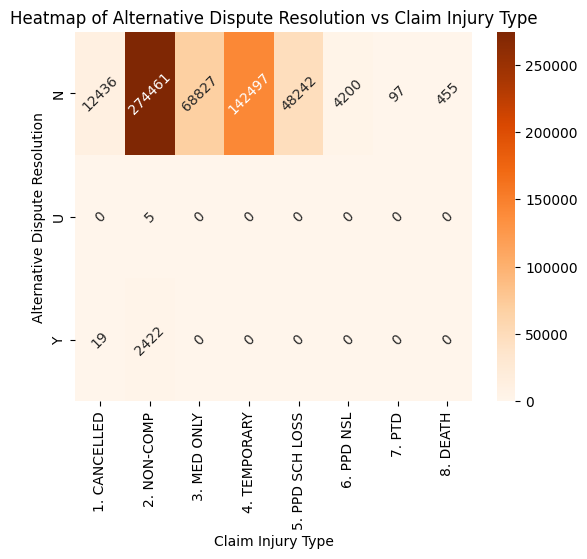

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

crosstab = pd.crosstab(df['Alternative Dispute Resolution'], 
                       df['Claim Injury Type'])


sns.heatmap(crosstab, annot=True, fmt="d", cmap="Oranges"
           , annot_kws={"rotation": 45})
plt.title("Heatmap of Alternative Dispute Resolution vs Claim Injury Type")
plt.show()

In [206]:
rank_df.columns

Index(['1. CANCELLED', '2. NON-COMP', '3. MED ONLY', '4. TEMPORARY',
       '5. PPD SCH LOSS', '6. PPD NSL', '7. PTD', '8. DEATH'],
      dtype='object', name='Claim Injury Type')

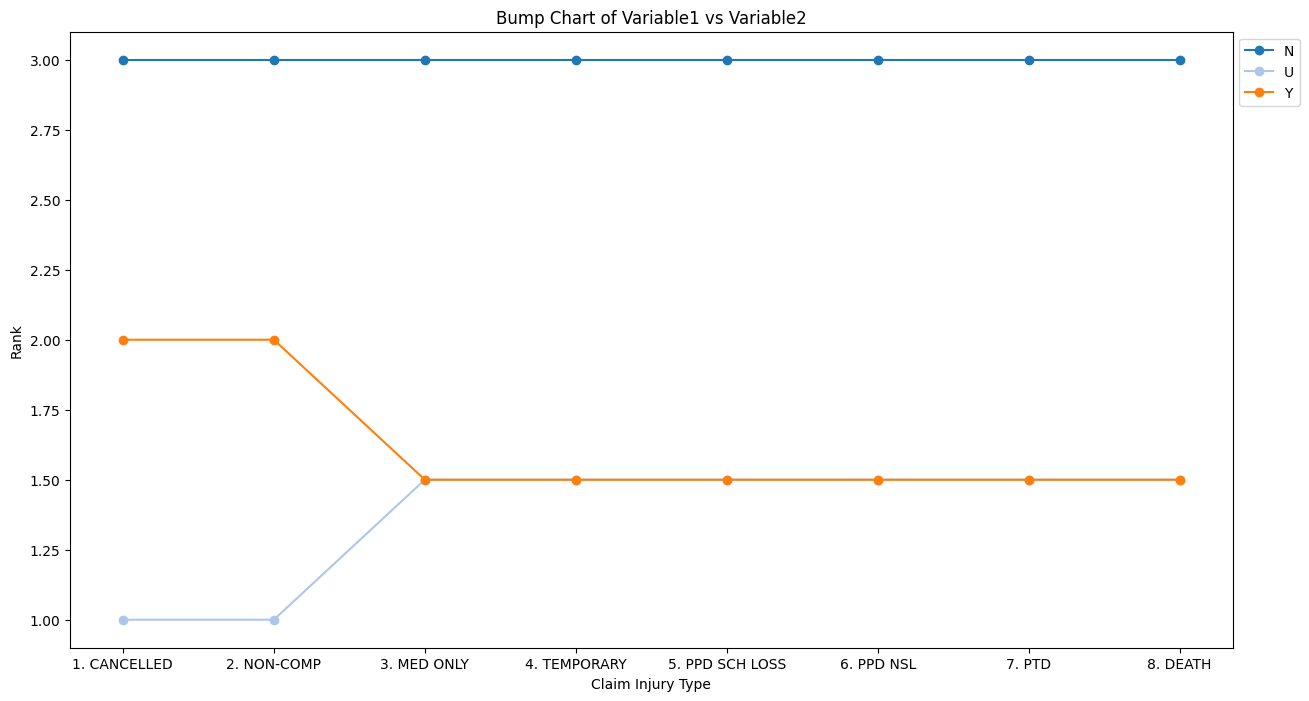

In [26]:
pivot_df = df.groupby(['Alternative Dispute Resolution', 
                       'Claim Injury Type']).size().unstack(fill_value=0)

# Normalize data to show ranks
rank_df = pivot_df.rank(axis=0)
colors = plt.cm.tab20.colors

colors = [colors[i % len(colors)] for i in range(len(df))]

# Plot rank data
ax = rank_df.T.plot(marker='o', figsize=(15, 8), color=colors)

plt.title("Bump Chart of Variable1 vs Variable2")
plt.ylabel("Rank")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

# 3. Data Cleaning & Preprocessing
The cleaning process involves handling missing values, correcting errors, and addressing inconsistencies identified earlier. Preprocessing includes tasks such as feature engineering, encoding categorical variables, normalizing numerical data, and splitting the data into training and testing sets. These steps are essential to ensure that the dataset is both structured and suitable for developing robust and reliable machine learning models.

<a href="#top">Top &#129033;</a>

**Claim Injury Type**

Having noted that in DF there are missing values in this variable, we must address them before continuing. Since this is our target, when missing the entire observation cannot be used for training purposes, therefore must be dropped.

In [7]:
# Filter and display rows where the 'Claim Injury Type' column has missing values
df[df['Claim Injury Type'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
957648180,NaT,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363651794,NaT,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209507552,NaT,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970865999,NaT,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807753247,NaT,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365870975,NaT,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327160035,NaT,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249875936,NaT,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Remove rows with missing values in the 'Claim Injury Type' column
df.dropna(subset=['Claim Injury Type'], inplace=True)

Having treated our target, it must also be encoded.

In [9]:
# Map descriptive labels in 'Claim Injury Type' to numeric codes for consistency and modeling
label_mapping = {
    "1. CANCELLED": 0,
    "2. NON-COMP": 1,
    "3. MED ONLY": 2,
    "4. TEMPORARY": 3,
    "5. PPD SCH LOSS": 4,
    "6. PPD NSL": 5,
    "7. PTD": 6,
    "8. DEATH": 7
}

In [10]:
df['Claim Injury Type'] = df['Claim Injury Type'].replace(label_mapping)

## 3.1 Duplicates
In this section, we will focus on detecting and handling duplicates to ensure data integrity and improve model performance. Addressing duplicates is a crucial preprocessing step that contributes to better data quality and more reliable machine learning outcomes.

<a href="#top">Top &#129033;</a>

In [11]:
# Identify and return rows that are duplicates in the DataFrame
df[df.duplicated()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5686771,NaT,0.0,N,2021-03-25,Y,0.0,1968.0,NaT,2021-03-16,ACE AMERICAN INSURANCE CO,1A. PRIVATE,0,UNKNOWN,N,NYC,2022-10-24,M,NaN,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,NaN,07032,0.0


In [12]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

## 3.2 Feature Engineering
Feature engineering is the process of transforming raw data into meaningful features to improve machine learning model performance. Effective feature engineering helps enhance predictive accuracy, reduce overfitting, and optimize model outcomes. In this section, we will explore various techniques and their impact on improving machine learning models.

<a href="#top">Top &#129033;</a>

### 3.2.1 Encoding

Encoding transforms categorical data into numerical format for use in machine learning models. For this section, several encoders were considered:
- **One Hot Encoding** -  turns a variable that is stored in a column into dummy variables stored over multiple columns and represented as 0s and 1s
- **Frequency Encoding** - replaces the categories by with their proportion in the dataset
- **Count Encoding** - replaces the categories by the number of times they appear in the dataset 
- **Manual Mapping Encoding** - manually attribute values to each category

<a href="#top">Top &#129033;</a>

**Alternative Dispute Resolution**

Knowing that 'N' is by far the most common category, and that 'U' only appears 5 times in DF data and 1 time in the test data, we decided to join 'U' and 'Y' into 'Y/U', and encode the variable as:
- 0 - N
- 1 - Y/U

In [13]:
print(df['Alternative Dispute Resolution'].value_counts())
print(' ')
print(test['Alternative Dispute Resolution'].value_counts())

Alternative Dispute Resolution
N    571411
Y      2609
U         5
Name: count, dtype: int64
 
Alternative Dispute Resolution
N    386314
Y      1660
U         1
Name: count, dtype: int64


In [14]:
df['Alternative Dispute Resolution Bin'] = df['Alternative Dispute Resolution'].replace({'N': 0, 'Y': 1, 'U': 1})
test['Alternative Dispute Resolution Bin'] = test['Alternative Dispute Resolution'].replace({'N': 0, 'Y': 1, 'U': 1})

**Attorney/Representative**

As this variable only has 2 categories, they will be encoded as follows:
- N - 0
- Y - 1

In [15]:
print(df['Attorney/Representative'].value_counts())
print(' ')
print(test['Attorney/Representative'].value_counts())

Attorney/Representative
N    392291
Y    181734
Name: count, dtype: int64
 
Attorney/Representative
N    306476
Y     81499
Name: count, dtype: int64


In [16]:
# Replace 'N' with 0 and 'Y' with 1 in the 'Attorney/Representative' column for binary encoding
df['Attorney/Representative Bin'] = df['Attorney/Representative'].replace({'N': 0, 'Y': 1})
test['Attorney/Representative Bin'] = test['Attorney/Representative'].replace({'N': 0, 'Y': 1})

**Carrier Name**

As Carrier name has a considerable amount of unique values, it will be encoded using Count Encoder.

In [17]:
# Get unique carrier names in train and test
train_carriers = set(df['Carrier Name'].unique())
test_carriers = set(test['Carrier Name'].unique())

# Find carriers in test that are not in train
test_only_carriers = test_carriers - train_carriers
train_only_carriers = train_carriers - test_carriers

# Display the result
print(f"Carrier Names in test but not in train: {test_only_carriers}")
print(f'Size of Carrier Names in test but not in train: {len(test_only_carriers)}')
print(' ')
print(f"Carrier Names in train but not in test: {train_only_carriers}")
print(f'Size of Carrier Names in train but not in test: {len(train_only_carriers)}')

Carrier Names in test but not in train: {'NEW LEBANON CENTRAL', 'TRAVELERS PROPERTY CAS. INS.', 'FRANKLIN CENTRAL SCHOOL', 'LOWVILLE CENTRAL SCHOOL', 'BERKSHIRE MUTUAL INS. CO.', 'SHELTER ISLAND UFSD', 'ROCHESTER GENERAL HOSPITAL', 'WINDHAM-ASHLAND-JEWETT CSD', 'ANDOVER CENTRAL SCHOOL DIST', 'FULTON BOILER WORKS INC', 'EASTPORT UFSD', 'EXPLORER INSURANCE COMPANY', 'FIRE & CASUALTY INS CO OF CONN', 'TOWN OF NEWBURGH', 'MAJESTIC INSURANCE COMPANY', 'EAST HAMPTON, TOWN OF', 'MONTAUK UNION FREE', 'SAFETY FIRST INSURANCE CO', 'GRANVILLE CSD', 'NORTH POINTE INSURANCE CO.', 'ULLICO CASUALTY COMPANY', 'SCHROON LAKE CSD', 'HOLLAND PATENT CENTRAL SCHOOL', 'T. MARZETTI COMPANY', 'DEPUTY DIRECTOR OF HUMAN RESOU', 'HOME INSURANCE COMPANY', 'ROOT PROPERTY & CASUALTY', 'COREPOINTE  INSURANCE COMPANY', 'COREPOINTE INSURANCE CO', 'ALLSTATE INDEMNITY COMPANY', 'ST. PAUL PROTECTIVE INS CO', 'FRANK WINSTON CRUM INSURANCE', 'TRAVELERS CASUALTY & SURETY', 'CLYDE-SAVANNAH CENTRAL', 'MANUFACTURING SELF-INS TR

In [18]:
common_categories = train_carriers.intersection(test_carriers)
len(common_categories)

1521

In [19]:
common_category_map = {category: idx + 1 for idx, category in enumerate(common_categories)}

def encode_category(carrier, carrier_map):
    return carrier_map.get(carrier, 0)

In [20]:
df['Carrier Name Enc'] = df['Carrier Name'].apply(lambda x: encode_category(x, common_category_map))
test['Carrier Name Enc'] = test['Carrier Name'].apply(lambda x: encode_category(x, common_category_map))


**Carrier Type**

DF contains 8 unique values, whereas test only contains 7. The difference is in '5C. SPECIAL FUND - POI CARRIER WCB MENANDS'. Knowing this, we decided to group all '5' categories into a single one: 
- '5. SPECIAL FUND'

In [21]:
print(df['Carrier Type'].value_counts())
print(' ')
print(test['Carrier Type'].value_counts())

Carrier Type
1A. PRIVATE                                    285367
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: count, dtype: int64
 
Carrier Type
1A. PRIVATE                                    201827
3A. SELF PUBLIC                                 78948
2A. SIF                                         66189
4A. SELF PRIVATE                                38619
UNKNOWN                                          1642
5D. SPECIAL FUND - UNKNOWN                        748
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         2
Name: count, dtype: int64


In [22]:
mapping = {
    '5D. SPECIAL FUND - UNKNOWN': '5. SPECIAL FUND',
    '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': '5. SPECIAL FUND',
    '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': '5. SPECIAL FUND'
}

In [23]:
# Apply the mapping to standardize 'Carrier Type' values
df['Carrier Type'] = df['Carrier Type'].replace(mapping)

test['Carrier Type'] = test['Carrier Type'].replace(mapping)

After doing so, we decided to encode them in 2 distinct ways, and choose the best option in feature selection.

Starting with **Count Encoding**

In [24]:
freq = df['Carrier Type'].value_counts()

df['Carrier Type freq'] = df['Carrier Type'].map(freq)
test['Carrier Type freq'] = test['Carrier Type'].map(freq)

And **One-Hot-Encoding**

In [25]:
# Convert the 'Carrier Type' column into one-hot encoded dummy variables
df = pd.get_dummies(df, columns=['Carrier Type'])
test = pd.get_dummies(test, columns=['Carrier Type'])

# Drop the last dummy variable to prevent multicollinearity (redundancy)
df = df.iloc[:, :-1]
test = test.iloc[:, :-1]

In [26]:
# Select columns related to 'Carrier Type' based on their column names
dummy_columns = df.filter(like='Carrier Type').columns

df[dummy_columns] = df[dummy_columns].astype(int)
test[dummy_columns] = test[dummy_columns].astype(int)

**County of Injury**

As County of Injury has a considerable amount of unique values, it will be encoded using Count Encoder.

In [27]:
# Count the frequency of each unique value in the 'County of Injury' column
freq = df['County of Injury'].value_counts()

# Map the frequency of each 'County of Injury' to replace values with their respective counts
df['County of Injury freq'] = df['County of Injury'].map(freq)
test['County of Injury freq'] = test['County of Injury'].map(freq)

**COVID-19 Indicator**

As this variable only has 2 categories, they will be encoded as follows:
- N - 0
- Y - 1

In [28]:
print(df['COVID-19 Indicator'].value_counts())
print(' ')
print(test['COVID-19 Indicator'].value_counts())

COVID-19 Indicator
N    546504
Y     27521
Name: count, dtype: int64
 
COVID-19 Indicator
N    385434
Y      2541
Name: count, dtype: int64


In [29]:
df['COVID-19 Indicator Enc'] = df['COVID-19 Indicator'].replace({'N': 0, 'Y': 1})
test['COVID-19 Indicator Enc'] = test['COVID-19 Indicator'].replace({'N': 0, 'Y': 1})

**District Name**

As this variable has 8 unique values, Count Encoder will be used.

In [30]:
print(df['District Name'].value_counts())
print(' ')
print(test['District Name'].value_counts())

District Name
NYC           270778
ALBANY         86171
HAUPPAUGE      60536
BUFFALO        45605
SYRACUSE       44646
ROCHESTER      40449
BINGHAMTON     21864
STATEWIDE       3976
Name: count, dtype: int64
 
District Name
NYC           187972
ALBANY         56500
HAUPPAUGE      36656
BUFFALO        31481
SYRACUSE       29537
ROCHESTER      28073
BINGHAMTON     15382
STATEWIDE       2374
Name: count, dtype: int64


In [31]:
freq = df['District Name'].value_counts()

In [32]:
# Replace each district name in the 'District Name' column with its corresponding frequency count
df['District Name freq'] = df['District Name'].map(freq)
test['District Name freq'] = test['District Name'].map(freq)

**Gender**

As the number of 'X' and 'U' genders is very small compared with the others, they are going to be grouped and encoded as follows.
- M - 0
- F - 1
- U & X - U/X - 2

In [33]:
print(df['Gender'].value_counts())
print(' ')
print(test['Gender'].value_counts())

Gender
M    335217
F    234051
U      4711
X        46
Name: count, dtype: int64
 
Gender
M    215343
F    167019
U      5340
X       273
Name: count, dtype: int64


In [34]:
mapping = {  
    'M': 'M',
    'F': 'F',
    'U': 'U/X',  
    'X': 'U/X'
}

df['Gender'] = df['Gender'].map(mapping)  
test['Gender'] = test['Gender'].map(mapping) 

In [35]:
df['Gender Enc'] = df['Gender'].replace({'M': 0, 'F': 1, 'U/X': 2})
test['Gender Enc'] = test['Gender'].replace({'M': 0, 'F': 1, 'U/X': 2})

Since after grouping we only have 3 categories, we will also use **One-Hot-Encoding** and decide which is better in feature selection.

In [36]:
# Convert the 'Carrier Type' column into one-hot encoded dummy variables
df = pd.get_dummies(df, columns=['Gender'])
test = pd.get_dummies(test, columns=['Gender'])

# Drop the last dummy variable to prevent multicollinearity (redundancy)
df = df.iloc[:, :-1]
test = test.iloc[:, :-1]

In [37]:
# Select columns related to 'Carrier Type' based on their column names
dummy_columns = df.filter(like='Gender').columns

df[dummy_columns] = df[dummy_columns].astype(int)
test[dummy_columns] = test[dummy_columns].astype(int)

**Medical Fee Region**

Even though this variable only contains 5 unique values, it is not clear whether there is an order between them or not. Therefore we will use **Count Encoding**

In [38]:
print(df['Medical Fee Region'].value_counts())
print(' ')
print(test['Medical Fee Region'].value_counts())

Medical Fee Region
IV     265981
I      135885
II      85033
III     53654
UK      33472
Name: count, dtype: int64
 
Medical Fee Region
IV     182276
I       91300
II      58743
III     34679
UK      20977
Name: count, dtype: int64


In [39]:
freq = df['Medical Fee Region'].value_counts()

# Replace each 'Medical Fee Region' value with its corresponding frequency count
df['Medical Fee Region freq'] = df['Medical Fee Region'].map(freq)
test['Medical Fee Region freq'] = test['Medical Fee Region'].map(freq)

### 3.2.2 Feature Creation

<a href="#top">Top &#129033;</a>

**Date Columns**

For each date column, the Year, Month, Day and Week Day (0=Monday, 6=Sunday) will be extracted.

In [40]:
for column in df.columns:
    # Check if the column is a datetime type
    if pd.api.types.is_datetime64_any_dtype(df[column]) and column not in ['C-3 Date', 'First Hearing Date']:
        # Extract year, month, and day and create new columns
        df[f'{column} Year'] = df[column].dt.year
        df[f'{column} Month'] = df[column].dt.month
        df[f'{column} Day'] = df[column].dt.day
        df[f'{column} Day of Week'] = df[column].dt.weekday 
        
        test[f'{column} Year'] = test[column].dt.year
        test[f'{column} Month'] = test[column].dt.month
        test[f'{column} Day'] = test[column].dt.day
        test[f'{column} Day of Week'] = test[column].dt.weekday

**WCIO Codes**

All WCIO codes will be joined in a column. Before joining them, they will be transformed into integers. For this to be possible, missing values will be filled with a specific code, 0, which until now does not exist in any of the mentioned columns. We also needed to transform **WCIO Part Of Body Code** into the absolute value, since there was a negative code (-9). Before doing so, we ensured there was not any code with the same absolute number.

In [41]:
df['WCIO Part Of Body Code'] = df['WCIO Part Of Body Code'].abs()
test['WCIO Part Of Body Code'] = test['WCIO Part Of Body Code'].abs()

In [42]:
columns_to_join = [
    'WCIO Cause of Injury Code',
    'WCIO Nature of Injury Code',
    'WCIO Part Of Body Code'
]

df[columns_to_join] = df[columns_to_join].fillna(0).astype(int)
test[columns_to_join] = test[columns_to_join].fillna(0).astype(int)

df['WCIO Codes'] = df[columns_to_join].astype(str).agg(''.join, axis=1).astype(int)
test['WCIO Codes'] = test[columns_to_join].astype(str).agg(''.join, axis=1).astype(int)

**Zip Code**

Will be transformed into a Zip Code Valid, which evaluates the validity of the Zip Code:
- -1 for missing values
- 0 for a valid numeric value
- 1 for non-numeric zip codes

In [43]:
# Create a new column 'Zip Code Valid' to flag the validity of the 'Zip Code' field
df['Zip Code Valid'] = df['Zip Code'].apply(
    lambda x: -1 if pd.isna(x)          
    else (1 if not str(x).isnumeric()   
          else 0)                       
)


test['Zip Code Valid'] = test['Zip Code'].apply(
    lambda x: -1 if pd.isna(x)          
    else (1 if not str(x).isnumeric()   
          else 0)                       
)

**Industry Code Description**

The descriptions of the Industries will be grouped by sectors, as follows:
- Public Services / Government:
    - Public Administration 
    - Health Care and Social Assistance 
    - Educational Services 
    - Arts, Entertainment, and Recreation 
- Business Services:
    - Professional, Scientific, and Technical Services 
    - Administrative and Support and Waste Management and Remediation
    - Information 
    - Management of Companies and Enterprises 
    - Finance and Insurance 
- Retail and Wholesale:
    - Retail Trade
    - Wholesale Trade 
    - Accommodation and Food Services 
- Manufacturing and Construction:
    - Manufacturing 
    - Construction 
- Transportation:
    - Transportation and Warehousing 
- Agriculture and Natural Resources:
    - Agriculture, Forestry, Fishing, and Hunting 
    - Mining
- Utilities 
    - Utilities
- Other Services
    - Other Services (Except Public Services)

    
Then, they will be encoded.


In [44]:
df['Industry Sector'] = df['Industry Code Description'].apply(u.group_industry)
test['Industry Sector'] = test['Industry Code Description'].apply(u.group_industry)

Count Encoding

In [45]:
freq = df['Industry Sector'].value_counts()

In [46]:
df['Industry Sector Count Enc'] = df['Industry Sector'].map(freq)
test['Industry Sector Count Enc'] = test['Industry Sector'].map(freq)

**Age Groups**

Creating groups for age as follows:
- Minors (0): Ages 0-17
- Adults (1): Ages 18-64
- Seniors (2): Ages 65+

In [47]:
bins = [-1, 17, 64, 117]
labels = [0, 1, 2]

df['Age Group'] = pd.cut(df['Age at Injury'], bins=bins, labels=labels, right=True)

test['Age Group'] = pd.cut(test['Age at Injury'], bins=bins, labels=labels, right=True)

Drop treated and unnecessary columns before continuing.

In [48]:
# Columns to drop:
to_drop = ['Accident Date', 'Alternative Dispute Resolution', 'Assembly Date', 'Attorney/Representative',
              'C-2 Date', 'Carrier Name','County of Injury', 'COVID-19 Indicator', 'District Name',
              'Medical Fee Region', 'Zip Code', 'Industry Sector']

to_drop2 = ['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 
              'WCIO Part Of Body Description', 'Industry Code Description']

all_drop = to_drop + to_drop2

In [49]:
df.drop(columns = all_drop, axis = 1, inplace = True)
test.drop(columns = all_drop, axis = 1, inplace = True)

# 4. Missing Values

<a href="#top">Top &#129033;</a>

Before spliting df into train and validation sets, we can fill missing values with simple methods (constants, median)

In [50]:
df.isna().sum()

Age at Injury                              0
Average Weekly Wage                    28651
Birth Year                             29078
C-3 Date                              386781
Claim Injury Type                          0
First Hearing Date                    423228
IME-4 Count                           441222
Industry Code                           9957
WCIO Cause of Injury Code                  0
WCIO Nature of Injury Code                 0
WCIO Part Of Body Code                     0
Number of Dependents                       0
Alternative Dispute Resolution Bin         0
Attorney/Representative Bin                0
Carrier Name Enc                           0
Carrier Type freq                          0
Carrier Type_1A. PRIVATE                   0
Carrier Type_2A. SIF                       0
Carrier Type_3A. SELF PUBLIC               0
Carrier Type_4A. SELF PRIVATE              0
Carrier Type_5. SPECIAL FUND               0
County of Injury freq                      0
COVID-19 I

**Accident Date**

Fill Year, Month and Day with median. Then recompute full date and from there fill missing values in Day of Week

In [51]:
# Define median values for Accident-related features from the training dataset
accident_med = {
    'Accident Date Year': round(df['Accident Date Year'].median()), 
    'Accident Date Month': round(df['Accident Date Month'].median()),
    'Accident Date Day': round(df['Accident Date Day'].median() ) 
}

Fill with median

In [52]:
df['Accident Date Year'].fillna(accident_med['Accident Date Year'], inplace=True)  
df['Accident Date Month'].fillna(accident_med['Accident Date Month'], inplace=True)
df['Accident Date Day'].fillna(accident_med['Accident Date Day'], inplace=True) 

test['Accident Date Year'].fillna(accident_med['Accident Date Year'], inplace=True)  
test['Accident Date Month'].fillna(accident_med['Accident Date Month'], inplace=True)
test['Accident Date Day'].fillna(accident_med['Accident Date Day'], inplace=True) 

Convert to Integers

In [53]:
df['Accident Date Year'] = df['Accident Date Year'].astype('Int64')
df['Accident Date Month'] = df['Accident Date Month'].astype('Int64')
df['Accident Date Day'] = df['Accident Date Day'].astype('Int64')

test['Accident Date Year'] = test['Accident Date Year'].astype('Int64')
test['Accident Date Month'] = test['Accident Date Month'].astype('Int64')
test['Accident Date Day'] = test['Accident Date Day'].astype('Int64')

Identify missing values and recompute Accident date to fill Day of the week

In [54]:
# select missing
missing_dayofweek_df = df['Accident Date Day of Week'].isnull()

missing_dayofweek_test = test['Accident Date Day of Week'].isnull()

In [55]:
# compute temp accident date for missing values in day of week
df.loc[missing_dayofweek_df, 'TEMP Accident Date'] = pd.to_datetime(
    df.loc[missing_dayofweek_df, ['Accident Date Year', 'Accident Date Month', 'Accident Date Day']].astype(str).agg('-'.join, axis=1),
    errors='coerce'
)


test.loc[missing_dayofweek_test, 'TEMP Accident Date'] = pd.to_datetime(
    test.loc[missing_dayofweek_test, ['Accident Date Year', 'Accident Date Month', 'Accident Date Day']].astype(str).agg('-'.join, axis=1),
    errors='coerce'
)

In [56]:
df.loc[missing_dayofweek_df, 'Accident Date Day of Week'] = df.loc[missing_dayofweek_df, 'TEMP Accident Date'].dt.dayofweek

test.loc[missing_dayofweek_test, 'Accident Date Day of Week'] = test.loc[missing_dayofweek_test, 'TEMP Accident Date'].dt.dayofweek

**C-2 Date**

Fill Year, Month and Day with median. Then recompute full date and from there fill missing values in Day of Week

In [57]:
# Create a dictionary with the median values of 'C-2 Year', 'C-2 Month', and 'C-2 Day' from the training set
c2_med = {
    'C-2 Date Year': round(df['C-2 Date Year'].median()),
    'C-2 Date Month': round(df['C-2 Date Month'].median()),
    'C-2 Date Day': round(df['C-2 Date Day'].median())
}

Fill with median

In [58]:
df['C-2 Date Year'].fillna(c2_med['C-2 Date Year'], inplace=True)  
df['C-2 Date Month'].fillna(c2_med['C-2 Date Month'], inplace=True)
df['C-2 Date Day'].fillna(c2_med['C-2 Date Day'], inplace=True) 

test['C-2 Date Year'].fillna(c2_med['C-2 Date Year'], inplace=True)  
test['C-2 Date Month'].fillna(c2_med['C-2 Date Month'], inplace=True)
test['C-2 Date Day'].fillna(c2_med['C-2 Date Day'], inplace=True) 

Convert to Integers

In [59]:
df['C-2 Date Year'] = df['C-2 Date Year'].astype('Int64')
df['C-2 Date Month'] = df['C-2 Date Month'].astype('Int64')
df['C-2 Date Day'] = df['C-2 Date Day'].astype('Int64')

test['C-2 Date Year'] = test['C-2 Date Year'].astype('Int64')
test['C-2 Date Month'] = test['C-2 Date Month'].astype('Int64')
test['C-2 Date Day'] = test['C-2 Date Day'].astype('Int64')

Identify missing values and recompute Accident date to fill Day of the week

In [60]:
# select missing
missing_dayofweek_df = df['C-2 Date Day of Week'].isnull()

missing_dayofweek_test = test['C-2 Date Day of Week'].isnull()

In [61]:
# compute temp accident date for missing values in day of week
df.loc[missing_dayofweek_df, 'TEMP C-2 Date'] = pd.to_datetime(
    df.loc[missing_dayofweek_df, ['C-2 Date Year', 'C-2 Date Month', 'C-2 Date Day']].astype(str).agg('-'.join, axis=1),
    errors='coerce'
)


test.loc[missing_dayofweek_test, 'TEMP C-2 Date'] = pd.to_datetime(
    test.loc[missing_dayofweek_test, ['C-2 Date Year', 'C-2 Date Month', 'C-2 Date Day']].astype(str).agg('-'.join, axis=1),
    errors='coerce'
)

In [62]:
df.loc[missing_dayofweek_df, 'C-2 Date Day of Week'] = df.loc[missing_dayofweek_df, 'TEMP C-2 Date'].dt.dayofweek

test.loc[missing_dayofweek_test, 'C-2 Date Day of Week'] = test.loc[missing_dayofweek_test, 'TEMP C-2 Date'].dt.dayofweek

Remove temporary variables

In [63]:
df.drop(['TEMP Accident Date', 'TEMP C-2 Date'], 
        axis = 1, inplace = True)

test.drop(['TEMP Accident Date', 'TEMP C-2 Date'], 
        axis = 1, inplace = True)

**C-3 Date**

Create a Binary variable:
- 0 if C-3 date is missing
- 1 if C-3 date exists

In [64]:
df['C-3 Date Binary'] = df['C-3 Date'].notna().astype(int)

test['C-3 Date Binary'] = test['C-3 Date'].notna().astype(int)

**First Hearing Date**

Create a Binary variable:
- 0 if First Hearing Date is missing
- 1 if First Hearing Date exists

In [65]:
df['First Hearing Date Binary'] = df['First Hearing Date'].notna().astype(int)

test['First Hearing Date Binary'] = test['First Hearing Date'].notna().astype(int)

**IME-4 Count**

Since IME-4 Count represents the number of IME-4 forms received per claim, we considered that a missing value represented 0 received forms, hence we will fill them with 0.

In [66]:
df['IME-4 Count'] = df['IME-4 Count'].fillna(0)

test['IME-4 Count'] = test['IME-4 Count'].fillna(0)

**Industry Code**

Assuming that a missing value in Industry Code represents an unknown code, it will be filled with 0.

In [67]:
df['Industry Code'] = df['Industry Code'].fillna(0)

test['Industry Code'] = test['Industry Code'].fillna(0)

**Drop Treated**

In [68]:
treated_drop = ['C-3 Date', 'First Hearing Date']

In [69]:
df.drop(treated_drop, axis = 1, inplace = True)

test.drop(treated_drop, axis = 1, inplace = True)

# 4. Export

<a href="#top">Top &#129033;</a>

In [70]:
df.to_csv('project_data/train_data_EDA.csv')
test.to_csv('./project_data/test_data_EDA.csv')